In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Ignore warnings
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\dzmit\Downloads\archive (3)\Loan_Default.csv")

# EDA

In [5]:
df.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

In [6]:
df.describe()

ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%                0.076000       581.490000     360.000000    2.680000e+05   
50%                0.390400      2596.450000     360.000000    4.180000e+05   
75%                0.775400      4812.500000     360.000000    6.280000e+05   
max                3.357000     60000.000000     360.000000    1.650800e+07   

              income   Credit_Score            LTV         Status  \
count  139520.000000  148670.000000  133572.000000  148670.000000   
mean     6957.338876     699.789103      72.746457       0.246445   
std      6496.586382     115.875857      39.967603       0.430942   
min         0.000000     500.000000       0.967478       0.000000   
25%      3720.000000     599.000000      60.474860       0.000000   
50%      5760.000000     699.000000      75.135870       0.000000   
75%      8520.000000     800.000000      86.184211       0.000000   
max    578580.000000     900.000000    7831.250000       1.000000   

               dtir1  
count  124549.000000  
mean       37.732932  
std        10.545435  
min         5.000000  
25%        31.000000  
50%        39.000000  
75%        45.000000  
max        61.000000

In [7]:
ctypes = pd.concat([df.select_dtypes('object').nunique(), df.select_dtypes('object').isna().sum()], axis=1)
ctypes.columns = ['count_of_unique_values', 'none_count']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [9]:
df.shape

(148670, 34)

In [10]:
ctypes

count_of_unique_values  none_count
loan_limit                                      2        3344
Gender                                          4           0
approv_in_adv                                   2         908
loan_type                                       3           0
loan_purpose                                    4         134
Credit_Worthiness                               2           0
open_credit                                     2           0
business_or_commercial                          2           0
Neg_ammortization                               2         121
interest_only                                   2           0
lump_sum_payment                                2           0
construction_type                               2           0
occupancy_type                                  3           0
Secured_by                                      2           0
total_units                                     4           0
credit_type                                     4           0
co-applicant_credit_type                        2           0
age                                             7         200
submission_of_application                       2         200
Region                                          4           0
Security_Type                                   2           0

In [11]:
target = df.Status

cols_to_remove = [
    'ID',
    'year',
    'Interest_rate_spread',  # leaks target
    'rate_of_interest',
]

n_cols = [col for col in df.select_dtypes('number') if col not in [target.name] + cols_to_remove]

c_cols = [col for col in df.select_dtypes('object') if col != target.name]

powerlaw_n_cols = [
    'loan_amount',
    'Upfront_charges',
    'property_value',
    'income',
]

normal_n_cols = [
    'term',
    'Credit_Score',
    'LTV',
    'dtir1'
]

In [12]:
cols_to_remove

['ID', 'year', 'Interest_rate_spread', 'rate_of_interest']

In [13]:
set(df.columns) - set(n_cols) - set(c_cols)

{'ID', 'Interest_rate_spread', 'Status', 'rate_of_interest', 'year'}

In [14]:
n_cols

['loan_amount',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'dtir1']

## Boxplots

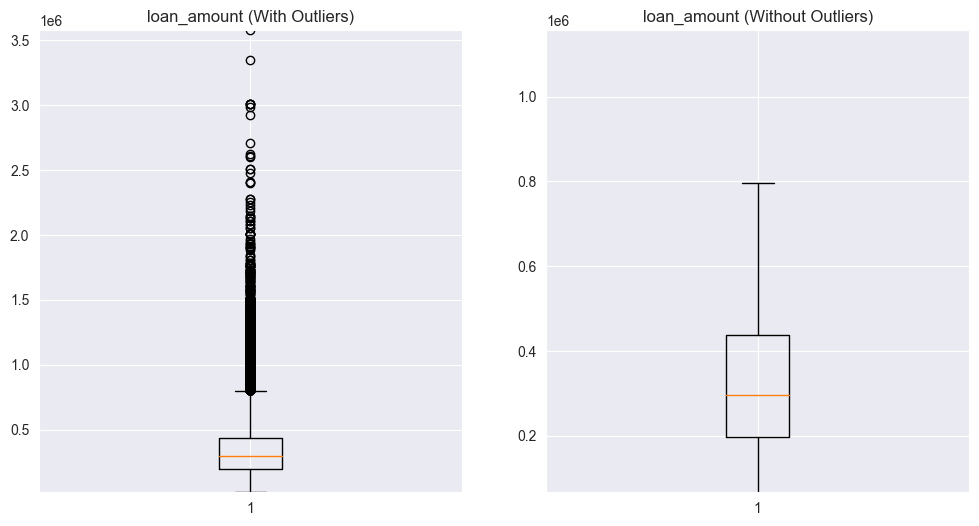

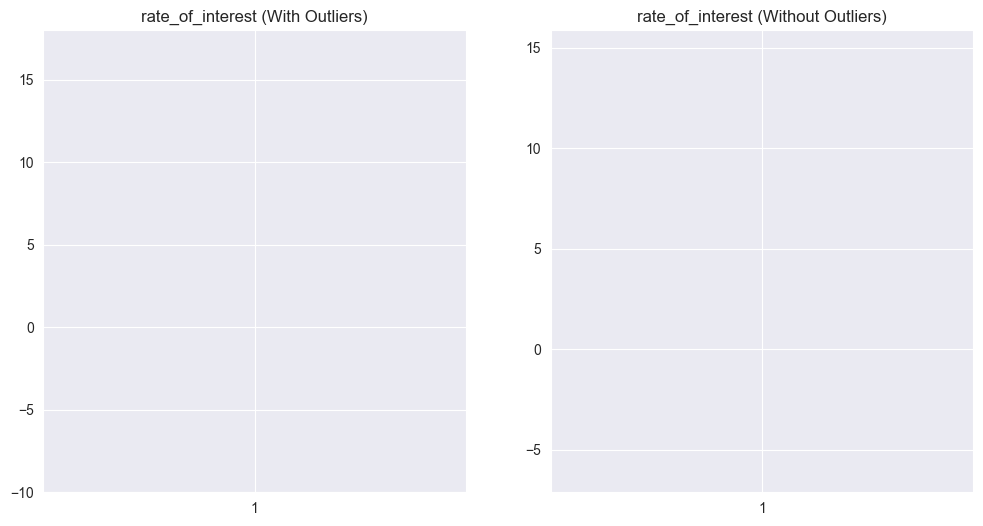

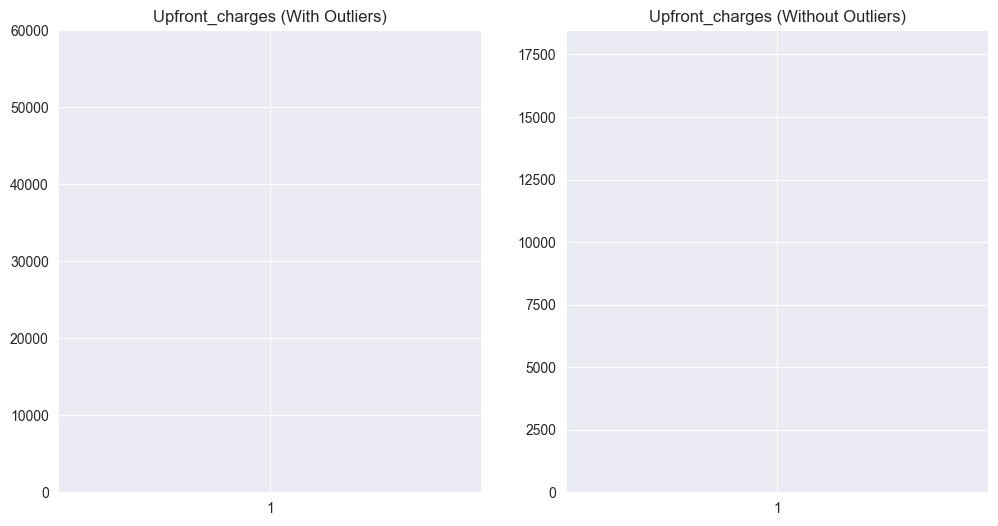

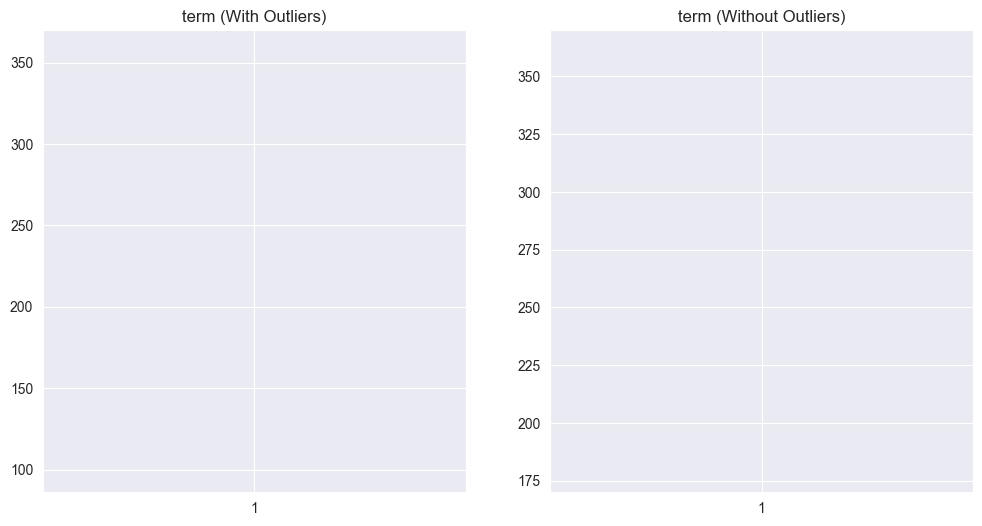

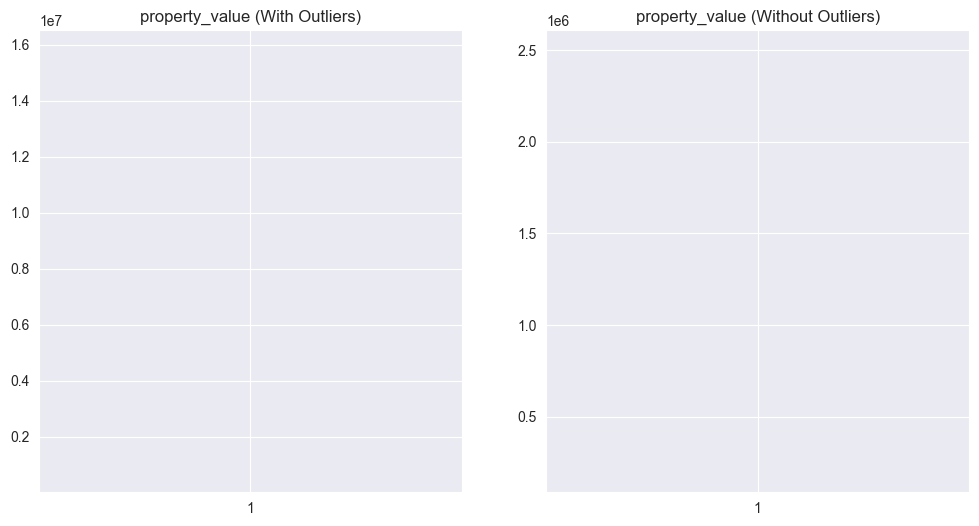

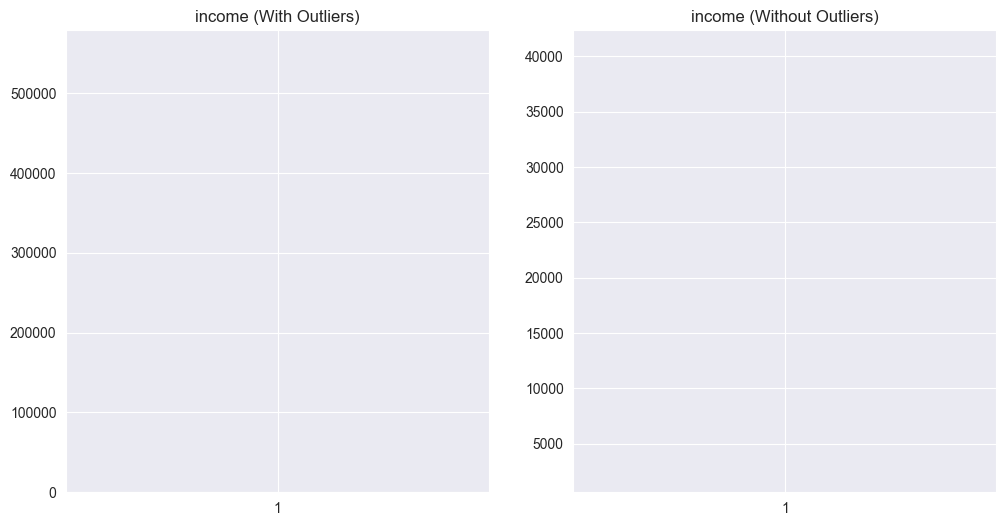

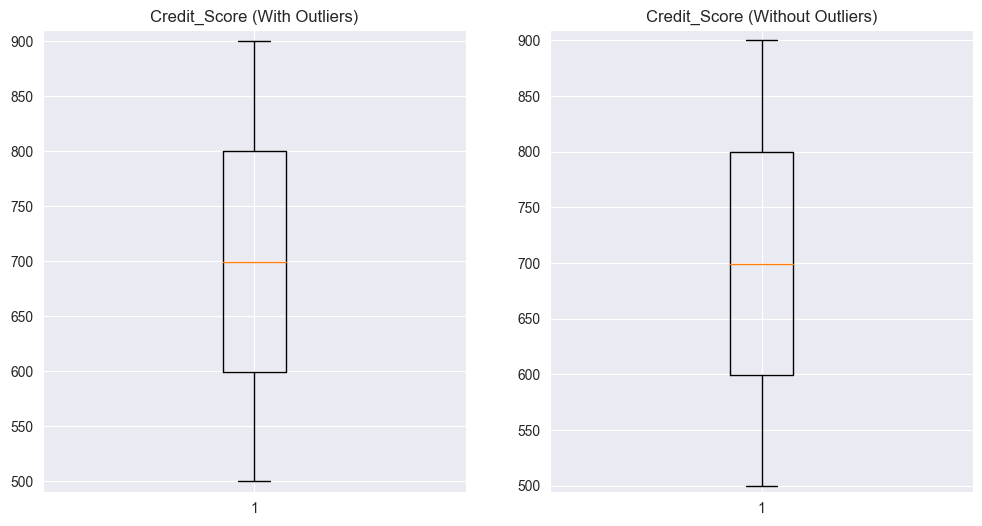

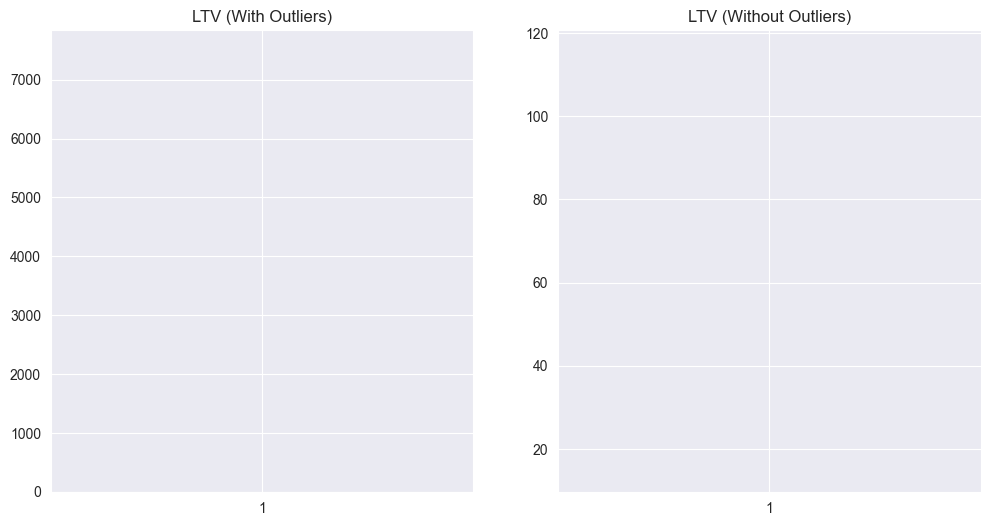

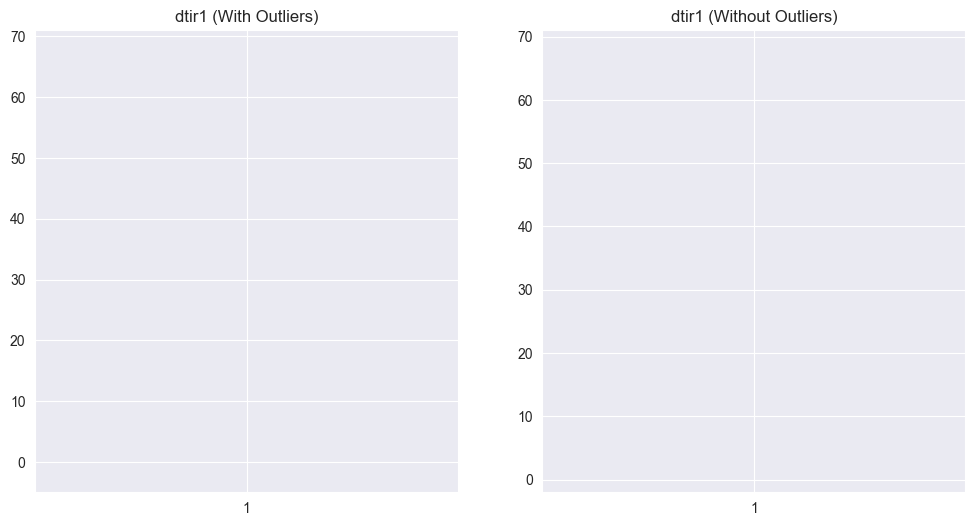

In [13]:
# Loop through each numerical feature
for feat in n_cols:

    # Initialize a 1x2 subplot grid for each feature
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot with outliers
    axes[0].boxplot(df[feat], showfliers=True)
    axes[0].set_title(f'{feat} (With Outliers)')

    # Boxplot without outliers
    axes[1].boxplot(df[feat], showfliers=False)
    axes[1].set_title(f'{feat} (Without Outliers)')

    # Set different y-axis limits
    axes[0].set_ylim([df[feat].min() - 10, df[feat].max() + 10])
    axes[1].set_ylim([df[feat].quantile(0.01) - 10, df[feat].quantile(0.997) + 10])

    plt.show()

## None and outlier counts

In [15]:
# Initialize lists to hold counts of None and outlier values
none_counts = []
outlier_counts = []

# Loop through each numerical feature
for col in n_cols:
    none_count = df[col].isna().sum()
    none_counts.append(none_count)

    # Drop None values to calculate outliers
    feature_data = df[col].dropna()

    # Calculate the IQR
    Q1 = feature_data.quantile(0.25)
    Q3 = feature_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((feature_data < lower_bound) | (feature_data > upper_bound)).sum()
    outlier_counts.append(outlier_count)

# Create a DataFrame to hold the counts
count_df = pd.DataFrame({
    'Feature': n_cols,
    'None_Count': none_counts,
    'Outlier_Count': outlier_counts
})

In [16]:
count_df.sort_values(by='None_Count', inplace=True)

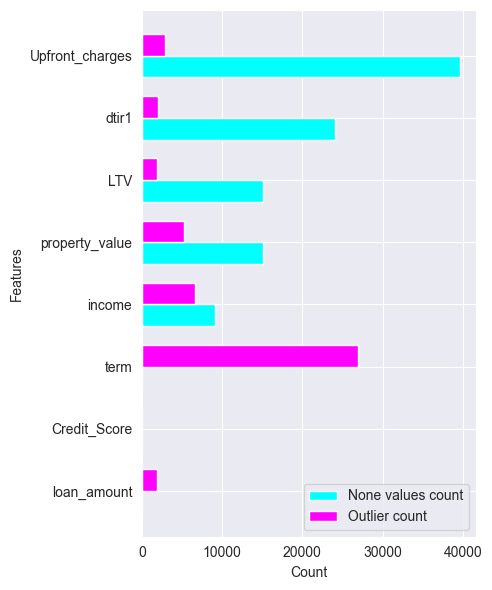

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing count_df remains the same.
y = np.arange(len(count_df['Feature']))

width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(5, 6))

rects1 = ax.barh(y - width/2, count_df['None_Count'], width, label='None values count', color='cyan')
rects2 = ax.barh(y + width/2, count_df['Outlier_Count'], width, label='Outlier count', color='magenta')

ax.set_xlabel('Count')
ax.set_ylabel('Features')
ax.set_yticks(y)
ax.set_yticklabels(count_df['Feature'])
ax.legend()

plt.tight_layout()

plt.savefig('none_and_outliers.png')

plt.show()


# Remove outliers

In [18]:
df_without_outliers = pd.DataFrame()

# Loop through each numerical feature
for col in n_cols:  # df.select_dtypes('number')
    # Calculate median, first quartile (Q1) and third quartile (Q3)
    median = df[col].median()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers and replace them with median
    df_without_outliers[col] = df[col].apply(lambda x: None if x < lower_bound or x > upper_bound else x).copy()


In [20]:
df_without_outliers = pd.concat([df_without_outliers, df.select_dtypes('object')], axis=1)
# df_without_outliers = pd.concat([df_without_outliers, df.select_dtypes('object')], axis=1)

In [21]:
df_without_outliers['Status'] = df['Status'].copy()

In [22]:
df_without_outliers.shape

(148670, 30)

## Histograms after removing outliers

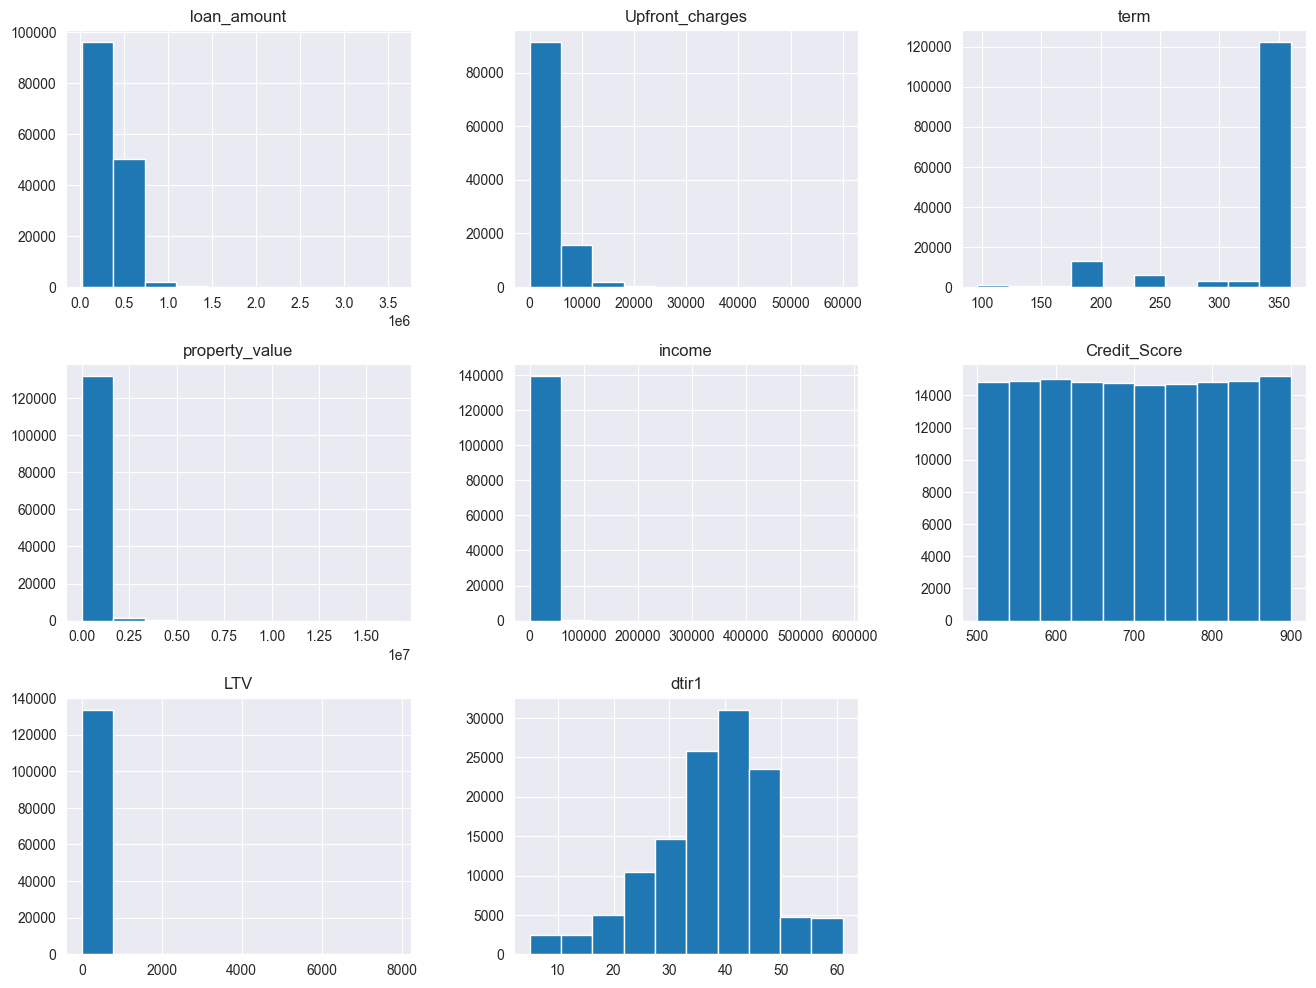

In [23]:
df[n_cols].hist(figsize=[16, 12])

plt.savefig('histograms_before.png')
plt.show()

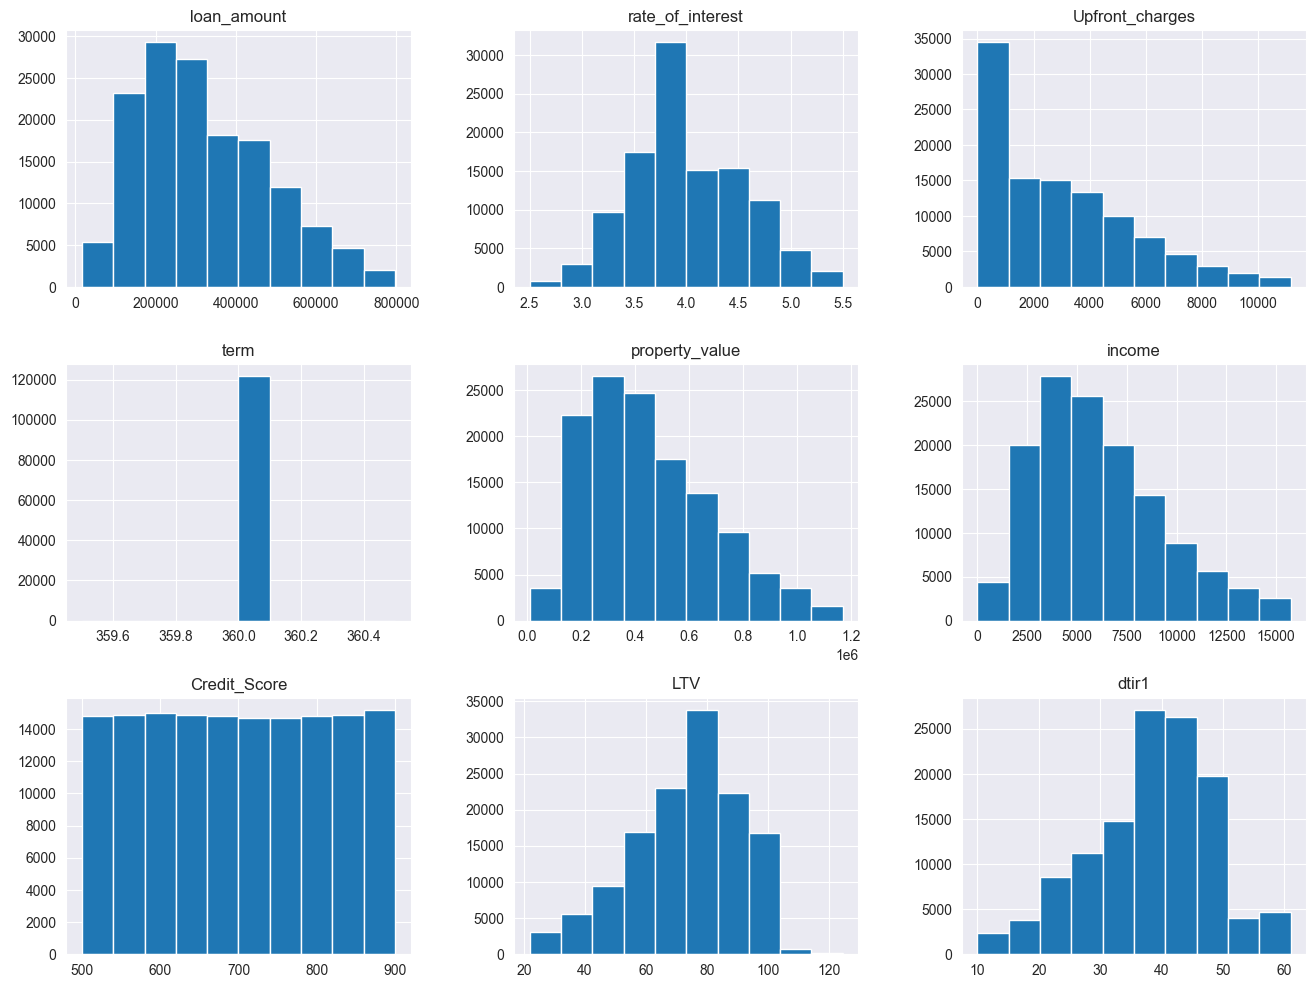

In [25]:
df_without_outliers[n_cols].hist(figsize=[16, 12])

plt.savefig('histograms_after.png')
plt.show()

In [27]:
corr = df[n_cols].corr()

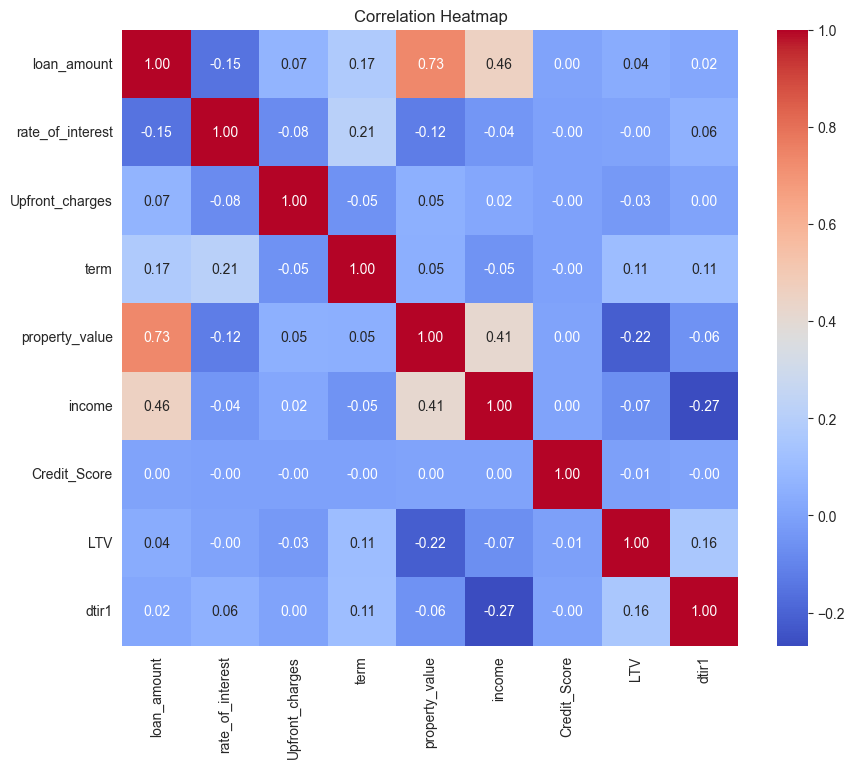

In [28]:
# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Target distribution

<Axes: title={'center': 'Distribution of Target Feature (Status)\n0 - normal loan\n1 - default loan'}>

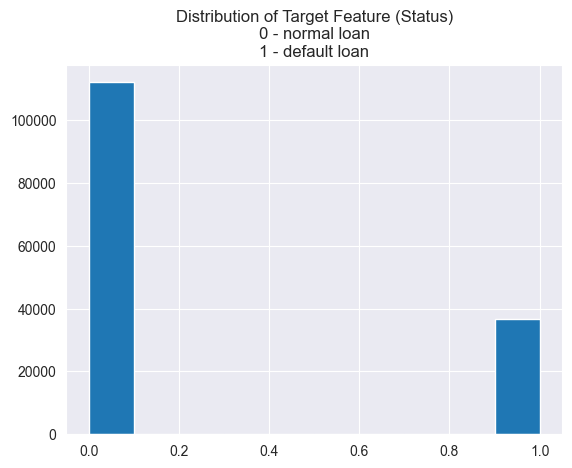

In [28]:
plt.title('Distribution of Target Feature (Status)\n0 - normal loan\n1 - default loan')

target.hist()

In [25]:
import numpy as np

In [31]:
from src.tools.machine_learning_utils.custom_transformers import FrequencyEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, TargetEncoder, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median').set_output(transform='pandas')), # mean
])

# Create FunctionTransformer
log_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median').set_output(transform='pandas')),
    ('log', FunctionTransformer(np.log1p, validate=True, feature_names_out='one-to-one').set_output(transform='pandas'))
])


categorical_label_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None_Category')), # mean
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    # ('encoder', TargetEncoder()),
])

categorical_proba_transformer = Pipeline(steps=[
    ('encoder', TargetEncoder()),
])

categorical_frequency_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None_Category')), # mean
    ('encoder', FrequencyEncoder()),
    # ('encoder', TargetEncoder()),
])

normalize_and_scaling_transformer = Pipeline([
    ('scaler', RobustScaler()),
])
# Create the preprocessor
tree_preprocessor = ColumnTransformer(
    transformers=[
        ('num_imp', numeric_transformer, normal_n_cols),
        ('num_log', log_transformer, powerlaw_n_cols),
        # ('num_imp', numeric_transformer, n_cols),
        ('onehot', categorical_label_transformer, c_cols),
        ('target', categorical_proba_transformer, c_cols),
        ('freq', categorical_frequency_transformer, c_cols),
    ]
).set_output(transform='pandas')

# Create the final pipeline
tree_pipeline = Pipeline(
    steps=[
        ('preprocessor', tree_preprocessor),
        ('norm', normalize_and_scaling_transformer),
        # ('imp', numeric_transformer),
    ]).set_output(transform='pandas')

In [32]:
tree_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_imp',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['term', 'Credit_Score',
                                                   'LTV', 'dtir1']),
                                                 ('num_log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>,
                                                                                       validate=True))]),
                                                  ['loa...
                                                   'loan_purpose',
                                                   'Credit_Worthiness',
                                                   'open_credit',
                                                   'business_or_commercial',
                                                   'Neg_ammortization',
                                                   'interest_only',
                                                   'lump_sum_payment',
                                                   'construction_type',
                                                   'occupancy_type',
                                                   'Secured_by', 'total_units',
                                                   'credit_type',
                                                   'co-applicant_credit_type',
                                                   'age',
                                                   'submission_of_application',
                                                   'Region',
                                                   'Security_Type'])])),
                ('norm', Pipeline(steps=[('scaler', RobustScaler())]))])

In [33]:
from sklearn.model_selection import train_test_split

# train_data_raw, test_data_raw, y_train, y_test = train_test_split(df, target)
train_data_raw, test_data_raw, y_train, y_test = train_test_split(df, target)

In [34]:
train_data_raw.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
120374  145264  2019         cf              Joint           pre     type3   
119736  144626  2019         cf             Female         nopre     type1   
42191    67081  2019         cf  Sex Not Available         nopre     type1   
135310  160200  2019        ncf  Sex Not Available         nopre     type1   
125396  150286  2019         cf             Female         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
120374           p4                l1        nopc                  nob/c  ...   
119736           p4                l1        nopc                  nob/c  ...   
42191            p3                l1        nopc                  nob/c  ...   
135310           p3                l1        nopc                  nob/c  ...   
125396           p4                l1        nopc                  nob/c  ...   

        credit_type  Credit_Score  co-applicant_credit_type    age  \
120374          EXP           586                       EXP  45-54   
119736         CRIF           618                       CIB  45-54   
42191           CIB           844                       EXP  55-64   
135310         CRIF           719                       EXP  45-54   
125396         CRIF           651                       CIB  55-64   

        submission_of_application        LTV Region Security_Type  Status  \
120374                   not_inst  63.968481  south        direct       0   
119736                   not_inst  45.287698  south        direct       0   
42191                     to_inst  30.507426  south        direct       0   
135310                    to_inst  74.701592  south        direct       1   
125396                    to_inst  59.908537  North        direct       0   

       dtir1  
120374   NaN  
119736  50.0  
42191   20.0  
135310  40.0  
125396  34.0  

[5 rows x 34 columns]

In [35]:
X_train = tree_pipeline.fit_transform(train_data_raw, y_train)

In [36]:
X_test = tree_pipeline.transform(test_data_raw)

In [37]:
X_train.head()

num_imp__term  num_imp__Credit_Score  num_imp__LTV  num_imp__dtir1  \
120374            0.0              -0.564356     -0.518532        0.000000   
119736            0.0              -0.405941     -1.386968        1.000000   
42191          -180.0               0.712871     -2.074076       -1.727273   
135310            0.0               0.094059     -0.019570        0.090909   
125396          -60.0              -0.242574     -0.707272       -0.454545   

        num_log__loan_amount  num_log__Upfront_charges  \
120374              0.512942                  0.411283   
119736              0.540694                 -6.925600   
42191              -0.231399                  0.313784   
135310              1.672450                  0.000000   
125396             -0.515438                  0.720649   

        num_log__property_value  num_log__income  \
120374                 0.701775         0.000000   
119736                 1.204772        -0.173784   
42191                  0.902072         0.712763   
135310                 1.756100         1.745420   
125396                -0.331861        -1.045173   

        onehot__loan_limit_None_Category  onehot__loan_limit_cf  ...  \
120374                               0.0                    0.0  ...   
119736                               0.0                    0.0  ...   
42191                                0.0                    0.0  ...   
135310                               0.0                   -1.0  ...   
125396                               0.0                    0.0  ...   

        freq__construction_type  freq__occupancy_type  freq__Secured_by  \
120374                      0.0                   0.0               0.0   
119736                      0.0                   0.0               0.0   
42191                       0.0                   0.0               0.0   
135310                      0.0                   0.0               0.0   
125396                      0.0                   0.0               0.0   

        freq__total_units  freq__credit_type  freq__co-applicant_credit_type  \
120374                0.0          -0.342896                            -1.0   
119736                0.0           0.000000                             0.0   
42191                 0.0           0.657104                            -1.0   
135310                0.0           0.000000                            -1.0   
125396                0.0           0.000000                             0.0   

        freq__age  freq__submission_of_application  freq__Region  \
120374   0.174975                             -1.0          -1.0   
119736   0.174975                             -1.0          -1.0   
42191    0.004330                              0.0          -1.0   
135310   0.174975                              0.0          -1.0   
125396   0.004330                              0.0           0.0   

        freq__Security_Type  
120374                  0.0  
119736                  0.0  
42191                   0.0  
135310                  0.0  
125396                  0.0  

[5 rows x 115 columns]

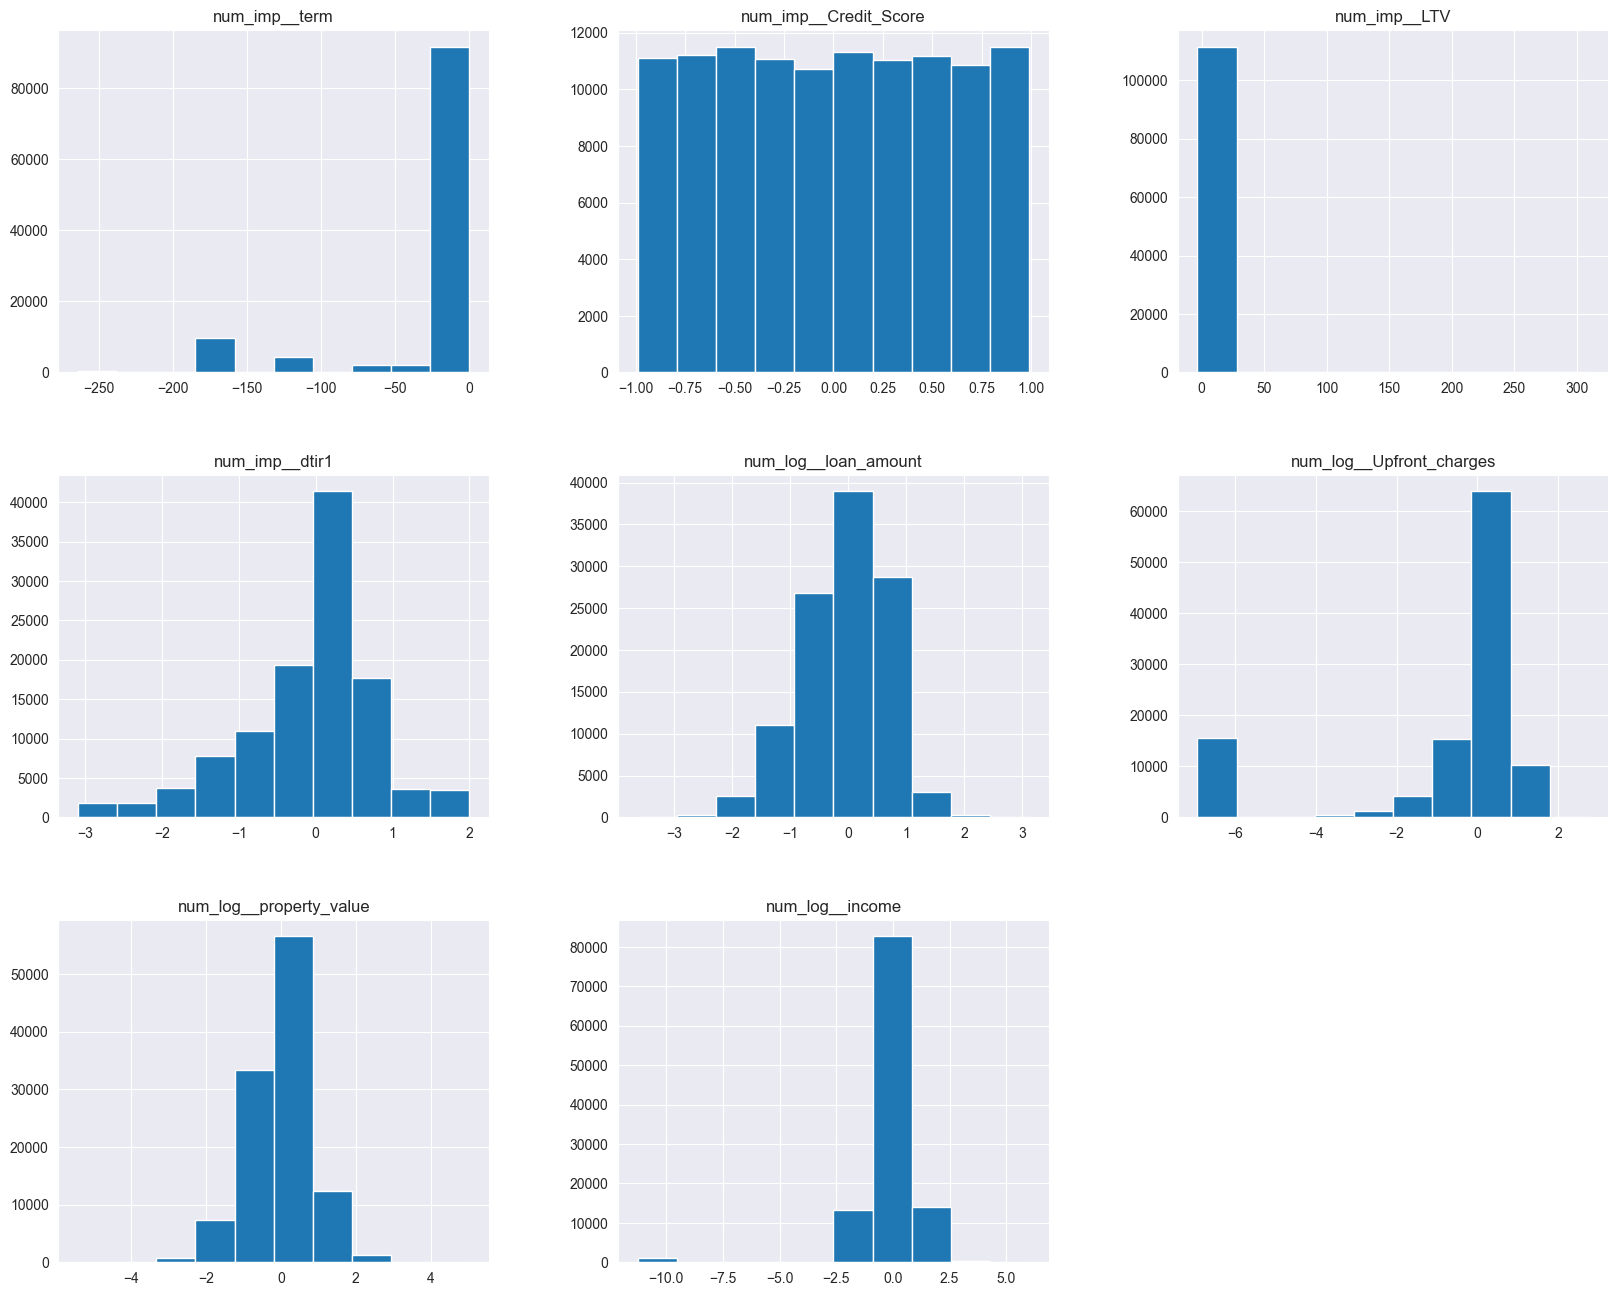

In [173]:
X_train[[f for f in X_train if 'num' in f]].hist(figsize=[20, 16])

plt.savefig('scaled.png')

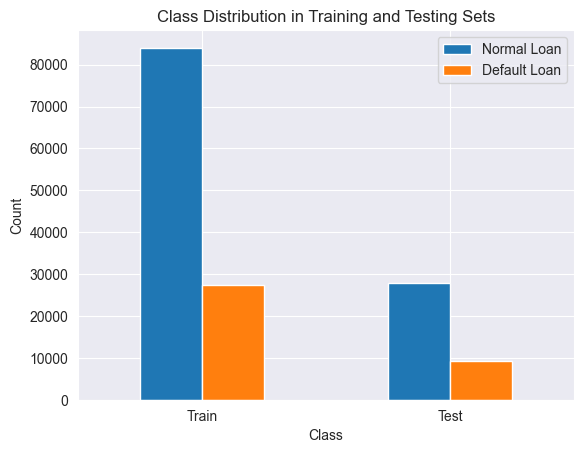

In [79]:
# Count the occurrences of each class in y_train and y_test
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

# Create a DataFrame for easy plotting
pd.DataFrame({'Train': train_counts, 'Test': test_counts}).T.plot(kind='bar')
plt.title('Class Distribution in Training and Testing Sets')
plt.xlabel('Class')
plt.ylabel('Count')

plt.xticks(rotation=0)

plt.legend(['Normal Loan', 'Default Loan'])
plt.show()

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, \
    classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import confusion_matrix




# Initialize models list
models = [
    ('Dummy', DummyClassifier(strategy="stratified", random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    # ('XGBoost', XGBClassifier(random_state=42)),
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('Ridge', RidgeClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('NN', MLPClassifier(random_state=42))
]

# Initialize an empty list to store metrics
metrics_list = []

# Loop through models
for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Initialize dict for this model's metrics
    model_metrics = {'Model': name}

    print('#' * 64)
    print(name)
    for dataset, X, y in [
        ('Train', X_train, y_train),
        ('Test', X_test, y_test),
    ]:
        # Make predictions
        y_pred = model.predict(X)
        try:
            y_prob = model.predict_proba(X)[:, 1]
        except AttributeError:
            print(f'Model {name} has no predict_proba. Hard prediction used')
            y_prob = y_pred

        # Compute metrics
        f1 = f1_score(y, y_pred,)
        precision = precision_score(y, y_pred,)
        recall = recall_score(y, y_pred,)
        auc = roc_auc_score(y, y_prob)
        kappa = cohen_kappa_score(y, y_pred)

        print(dataset)
        print(classification_report(y, y_pred))
        print(confusion_matrix(y, y_pred))

        # Append metrics to dict
        model_metrics.update({
            f'{dataset}_F1_Score': f1,
            f'{dataset}_Precision': precision,
            f'{dataset}_Recall': recall,
            f'{dataset}_AUC': auc,
            f'{dataset}_Kappa': kappa
        })

    # Append model metrics to list
    metrics_list.append(model_metrics)

# Convert list of metrics to DataFrame
metrics_df = pd.DataFrame(metrics_list, index=[i[0] for i in models])

################################################################
Dummy
Train
              precision    recall  f1-score   support

           0       0.75      0.75      0.75     84046
           1       0.25      0.25      0.25     27456

    accuracy                           0.63    111502
   macro avg       0.50      0.50      0.50    111502
weighted avg       0.63      0.63      0.63    111502

[[63417 20629]
 [20682  6774]]
Test
              precision    recall  f1-score   support

           0       0.75      0.76      0.75     27985
           1       0.24      0.24      0.24      9183

    accuracy                           0.63     37168
   macro avg       0.50      0.50      0.50     37168
weighted avg       0.63      0.63      0.63     37168

[[21132  6853]
 [ 6981  2202]]
################################################################
RandomForest
Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84046
         

In [39]:
metrics_df

Model  Train_F1_Score  Train_Precision  \
Dummy                            Dummy        0.246960         0.247199   
RandomForest              RandomForest        1.000000         1.000000   
LightGBM                      LightGBM        0.967013         0.937156   
LogisticRegression  LogisticRegression        0.625812         0.861650   
Ridge                            Ridge        0.616161         0.981917   
KNN                                KNN        0.743549         0.905469   
NN                                  NN        0.953617         0.928776   

                    Train_Recall  Train_AUC  Train_Kappa  Test_F1_Score  \
Dummy                   0.246722   0.500637     0.001274       0.241474   
RandomForest            1.000000   1.000000     1.000000       0.952043   
LightGBM                0.998834   0.998949     0.955776       0.961559   
LogisticRegression      0.491332   0.823321     0.544317       0.630417   
Ridge                   0.448936   0.723118     0.546013       0.622143   
KNN                     0.630755   0.947877     0.678551       0.676341   
NN                      0.979822   0.996799     0.937922       0.931448   

                    Test_Precision  Test_Recall  Test_AUC  Test_Kappa  
Dummy                     0.243181     0.239791  0.497455   -0.005114  
RandomForest              0.940215     0.964173  0.995956    0.936042  
LightGBM                  0.928593     0.996951  0.997122    0.948343  
LogisticRegression        0.860426     0.497441  0.823571    0.548727  
Ridge                     0.983522     0.454971  0.726235    0.552150  
KNN                       0.834799     0.568442  0.843140    0.595340  
NN                        0.900396     0.964717  0.993065    0.907911

In [40]:
metrics_df[[f for f in metrics_df if 'Test' in f]]

Test_F1_Score  Test_Precision  Test_Recall  Test_AUC  \
Dummy                    0.241474        0.243181     0.239791  0.497455   
RandomForest             0.952043        0.940215     0.964173  0.995956   
LightGBM                 0.961559        0.928593     0.996951  0.997122   
LogisticRegression       0.630417        0.860426     0.497441  0.823571   
Ridge                    0.622143        0.983522     0.454971  0.726235   
KNN                      0.676341        0.834799     0.568442  0.843140   
NN                       0.931448        0.900396     0.964717  0.993065   

                    Test_Kappa  
Dummy                -0.005114  
RandomForest          0.936042  
LightGBM              0.948343  
LogisticRegression    0.548727  
Ridge                 0.552150  
KNN                   0.595340  
NN                    0.907911

# Explanations with ELI5

In [41]:
import eli5

eli5.explain_weights_df(models[2][1], feature_names=list(X_train.columns))

feature    weight
0        num_log__Upfront_charges  0.687899
1        onehot__credit_type_EQUI  0.265585
2        onehot__open_credit_nopc  0.008199
3                    num_imp__LTV  0.004655
4                  num_imp__dtir1  0.004590
..                            ...       ...
110  onehot__Credit_Worthiness_l2  0.000000
111         target__Security_Type  0.000000
112           freq__approv_in_adv  0.000000
113       onehot__loan_purpose_p2  0.000000
114           freq__Security_Type  0.000000

[115 rows x 2 columns]

In [42]:
df.groupby('Status').agg(
    rate_of_interest_is_none_average=('rate_of_interest', lambda x: x.isna().mean()),
    Interest_rate_spread_is_none_average=('Interest_rate_spread', lambda x: x.isna().mean()),
    credit_type_is_none_average=('credit_type', lambda x: x.isna().mean()),
)

rate_of_interest_is_none_average  \
Status                                     
0                               0.000000   
1                               0.994541   

        Interest_rate_spread_is_none_average  credit_type_is_none_average  
Status                                                                     
0                                        0.0                          0.0  
1                                        1.0                          0.0

# Manual Error Analysis with LIME

In [49]:
model = models[2][1]

In [50]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=list(X_train.columns),
    class_names=['good', 'default'],
    discretize_continuous=True,
)


In [51]:
exp = explainer.explain_instance(
        data_row=X_test.iloc[-1],
        predict_fn=model.predict_proba, # Modify if your model's predict function is named differently
        # num_features=len(feature_names)
    )

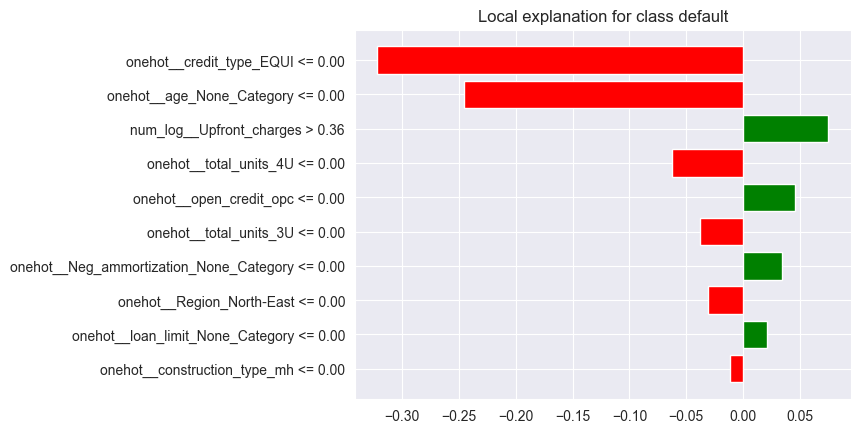

In [52]:
exp.as_pyplot_figure()

plt.show()

# SHAP feature summary

In [229]:
import shap

# Initialize the SHAP Explainer
explainer = shap.KernelExplainer(models[2][1].predict_proba, X_train.sample(100))

In [230]:
shap_values = explainer.shap_values(X_test.head(200))

  0%|          | 0/200 [00:00<?, ?it/s]

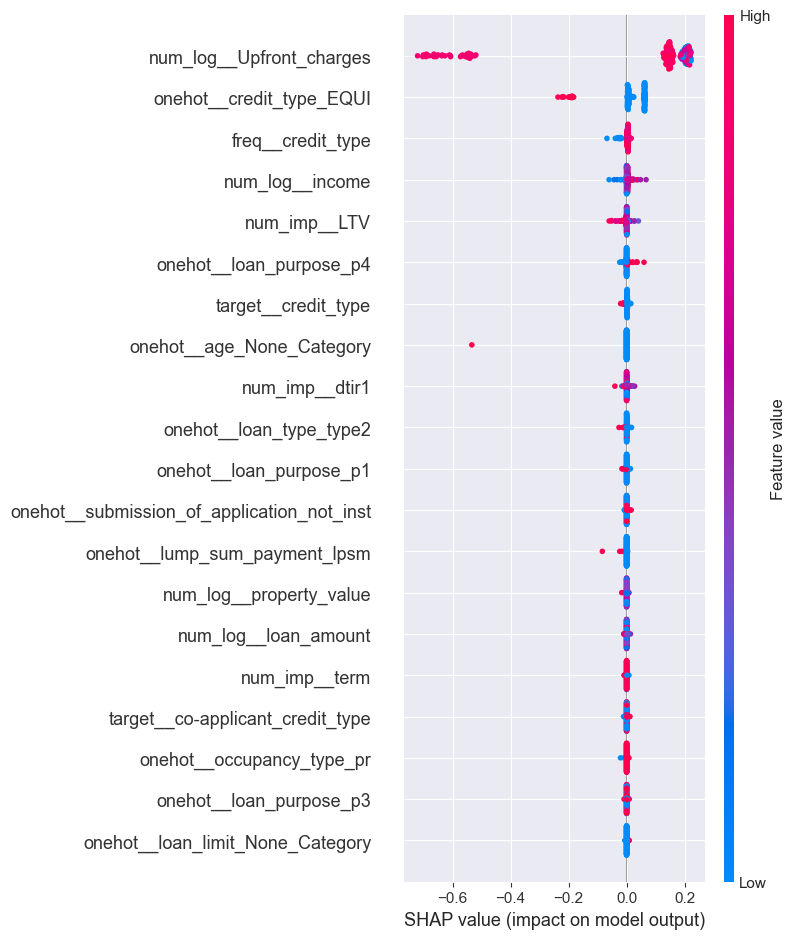

<Figure size 640x480 with 0 Axes>

In [231]:
# For classification, SHAP values will be a list with separate arrays for each class.
# Choose the class you're interested in. Here, we're using class 0.

shap.summary_plot(shap_values[0], X_test.head(200))

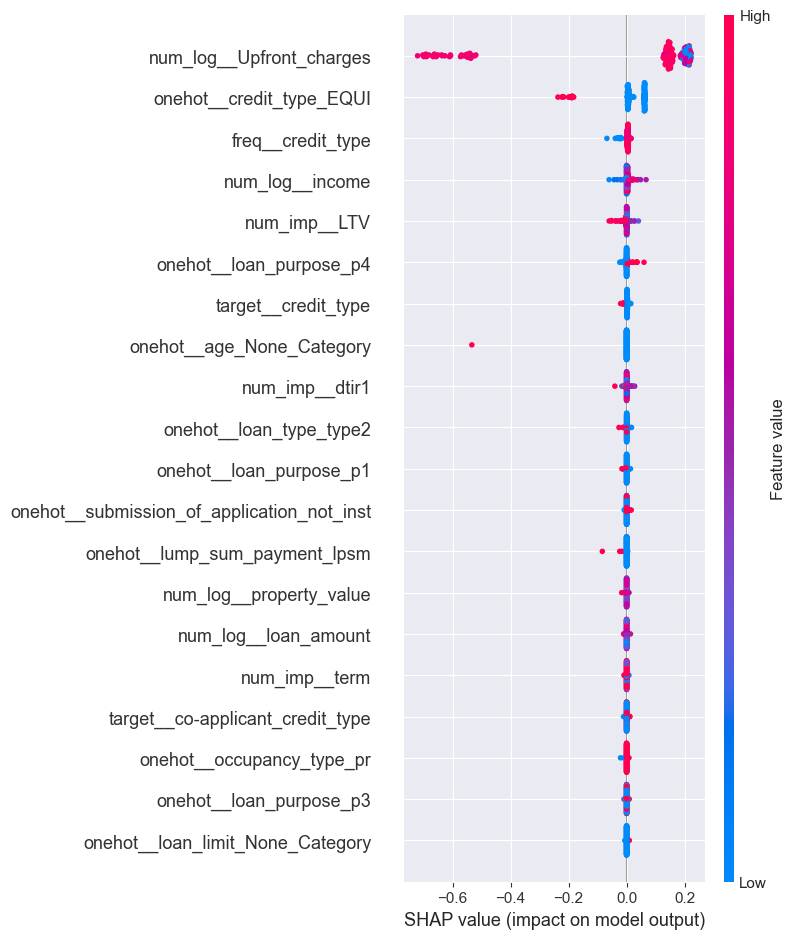

In [232]:
# Create a matplotlib figure and axes
fig, ax = plt.subplots()

# Generate the SHAP summary plot
shap.summary_plot(shap_values[0], X_test.head(200))

# Save the plot as a PNG file
fig.savefig('shap.png', bbox_inches='tight')
plt.close(fig)

# Confusion matrices

In [31]:
def plot_confusion_matrix(y_true, y_pred, model_name = '', validation = 'Train'):
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)

    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix\nfor {model_name}\n{validation}')

    plt.tight_layout()

    plt.savefig(f'{model_name}_{validation}_confusion.png')
    plt.show()


In [35]:
confusion_matrix(y_train.values, model.predict(X_train))

array([[82147,  1871],
       [   36, 27448]], dtype=int64)

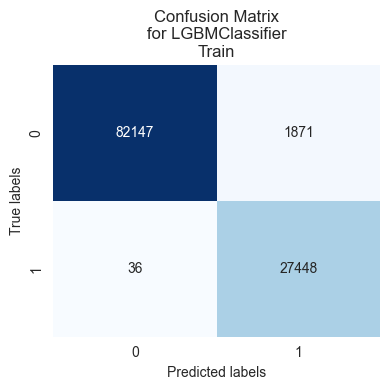

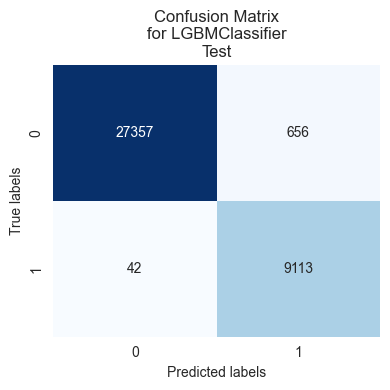

In [36]:
plot_confusion_matrix(y_train.values, model.predict(X_train), model_name='LGBMClassifier')
plot_confusion_matrix(y_test.values, model.predict(X_test), model_name='LGBMClassifier', validation='Test')

In [40]:
train_data_raw[['credit_type', 'Status']].value_counts().sort_index()

credit_type  Status
CIB          0         30325
             1          5737
CRIF         0         27608
             1          5286
EQUI         1         11480
EXP          0         26085
             1          4981
Name: count, dtype: int64

## multiple model training

# Post-training analysis

In [63]:
pd.concat([X_train['onehot__credit_type_EQUI'], y_train], axis=1).value_counts()

onehot__credit_type_EQUI  Status
0.0                       0         84045
                          1         16053
1.0                       1         11403
                          0             1
Name: count, dtype: int64

In [65]:
pd.concat([abs(X_train['num_log__Upfront_charges'] < 1), y_train], axis=1).value_counts()

num_log__Upfront_charges  Status
True                      0         77874
                          1         27454
False                     0          6172
                          1             2
Name: count, dtype: int64

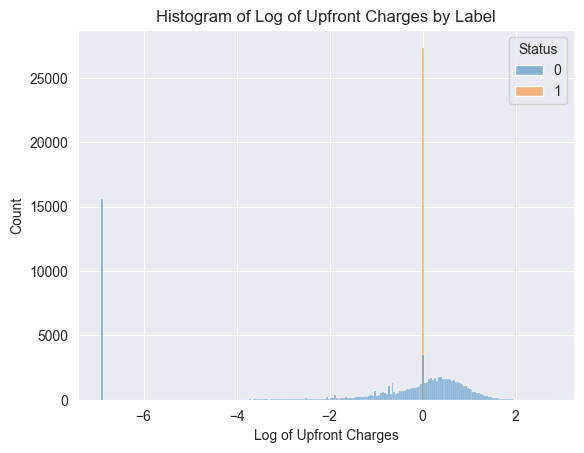

In [62]:
# Plotting the histogram
sns.histplot(
    data=pd.concat([X_train['num_log__Upfront_charges'], y_train], axis=1),
    x='num_log__Upfront_charges',
    hue='Status',
    element='bars',
    stat='count',
)
plt.xlabel('Log of Upfront Charges')
plt.ylabel('Count')
plt.title('Histogram of Log of Upfront Charges by Label')
plt.show()

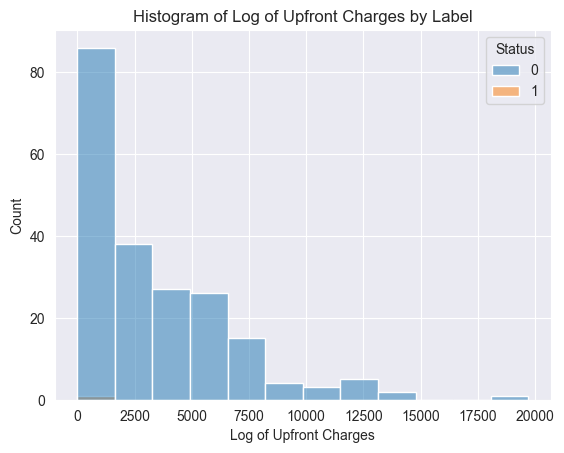

In [68]:
# Plotting the histogram
sns.histplot(
    data=df[['Upfront_charges', 'Status']].head(300),
    x='Upfront_charges',
    hue='Status',
    element='bars',
    stat='count',
)
plt.xlabel('Log of Upfront Charges')
plt.ylabel('Count')
plt.title('Histogram of Log of Upfront Charges by Label')
plt.show()

array([[<Axes: title={'center': 'num_log__Upfront_charges'}>,
        <Axes: title={'center': 'Status'}>]], dtype=object)

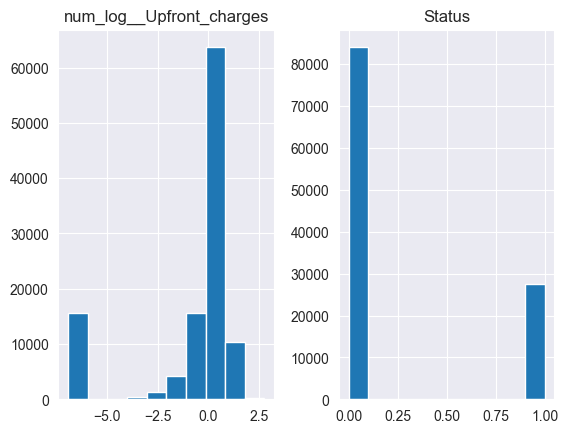

In [54]:
pd.concat([X_train['num_log__Upfront_charges'], y_train], axis=1).hist()

In [38]:
df_without_outliers[['credit_type', 'Status']].value_counts()

credit_type  Status
CIB          0         40542
CRIF         0         36774
EXP          0         34714
EQUI         1         15297
CIB          1          7610
CRIF         1          7127
EXP          1          6605
EQUI         0             1
Name: count, dtype: int64

In [39]:
df_without_outliers[['lump_sum_payment', 'Status']].value_counts()

lump_sum_payment  Status
not_lpsm          0         111275
                  1          34011
lpsm              1           2628
                  0            756
Name: count, dtype: int64

In [179]:
print(df_without_outliers[['Interest_rate_spread', 'Status']].fillna(df_without_outliers['Interest_rate_spread'].median()).corr())

                      Interest_rate_spread   Status
Interest_rate_spread               1.00000 -0.04526
Status                            -0.04526  1.00000


In [192]:
df_filtered['Gender'].map({'Male': 0, 'Female': 1}).corr(df_filtered['Status'])

-0.012007057702389624

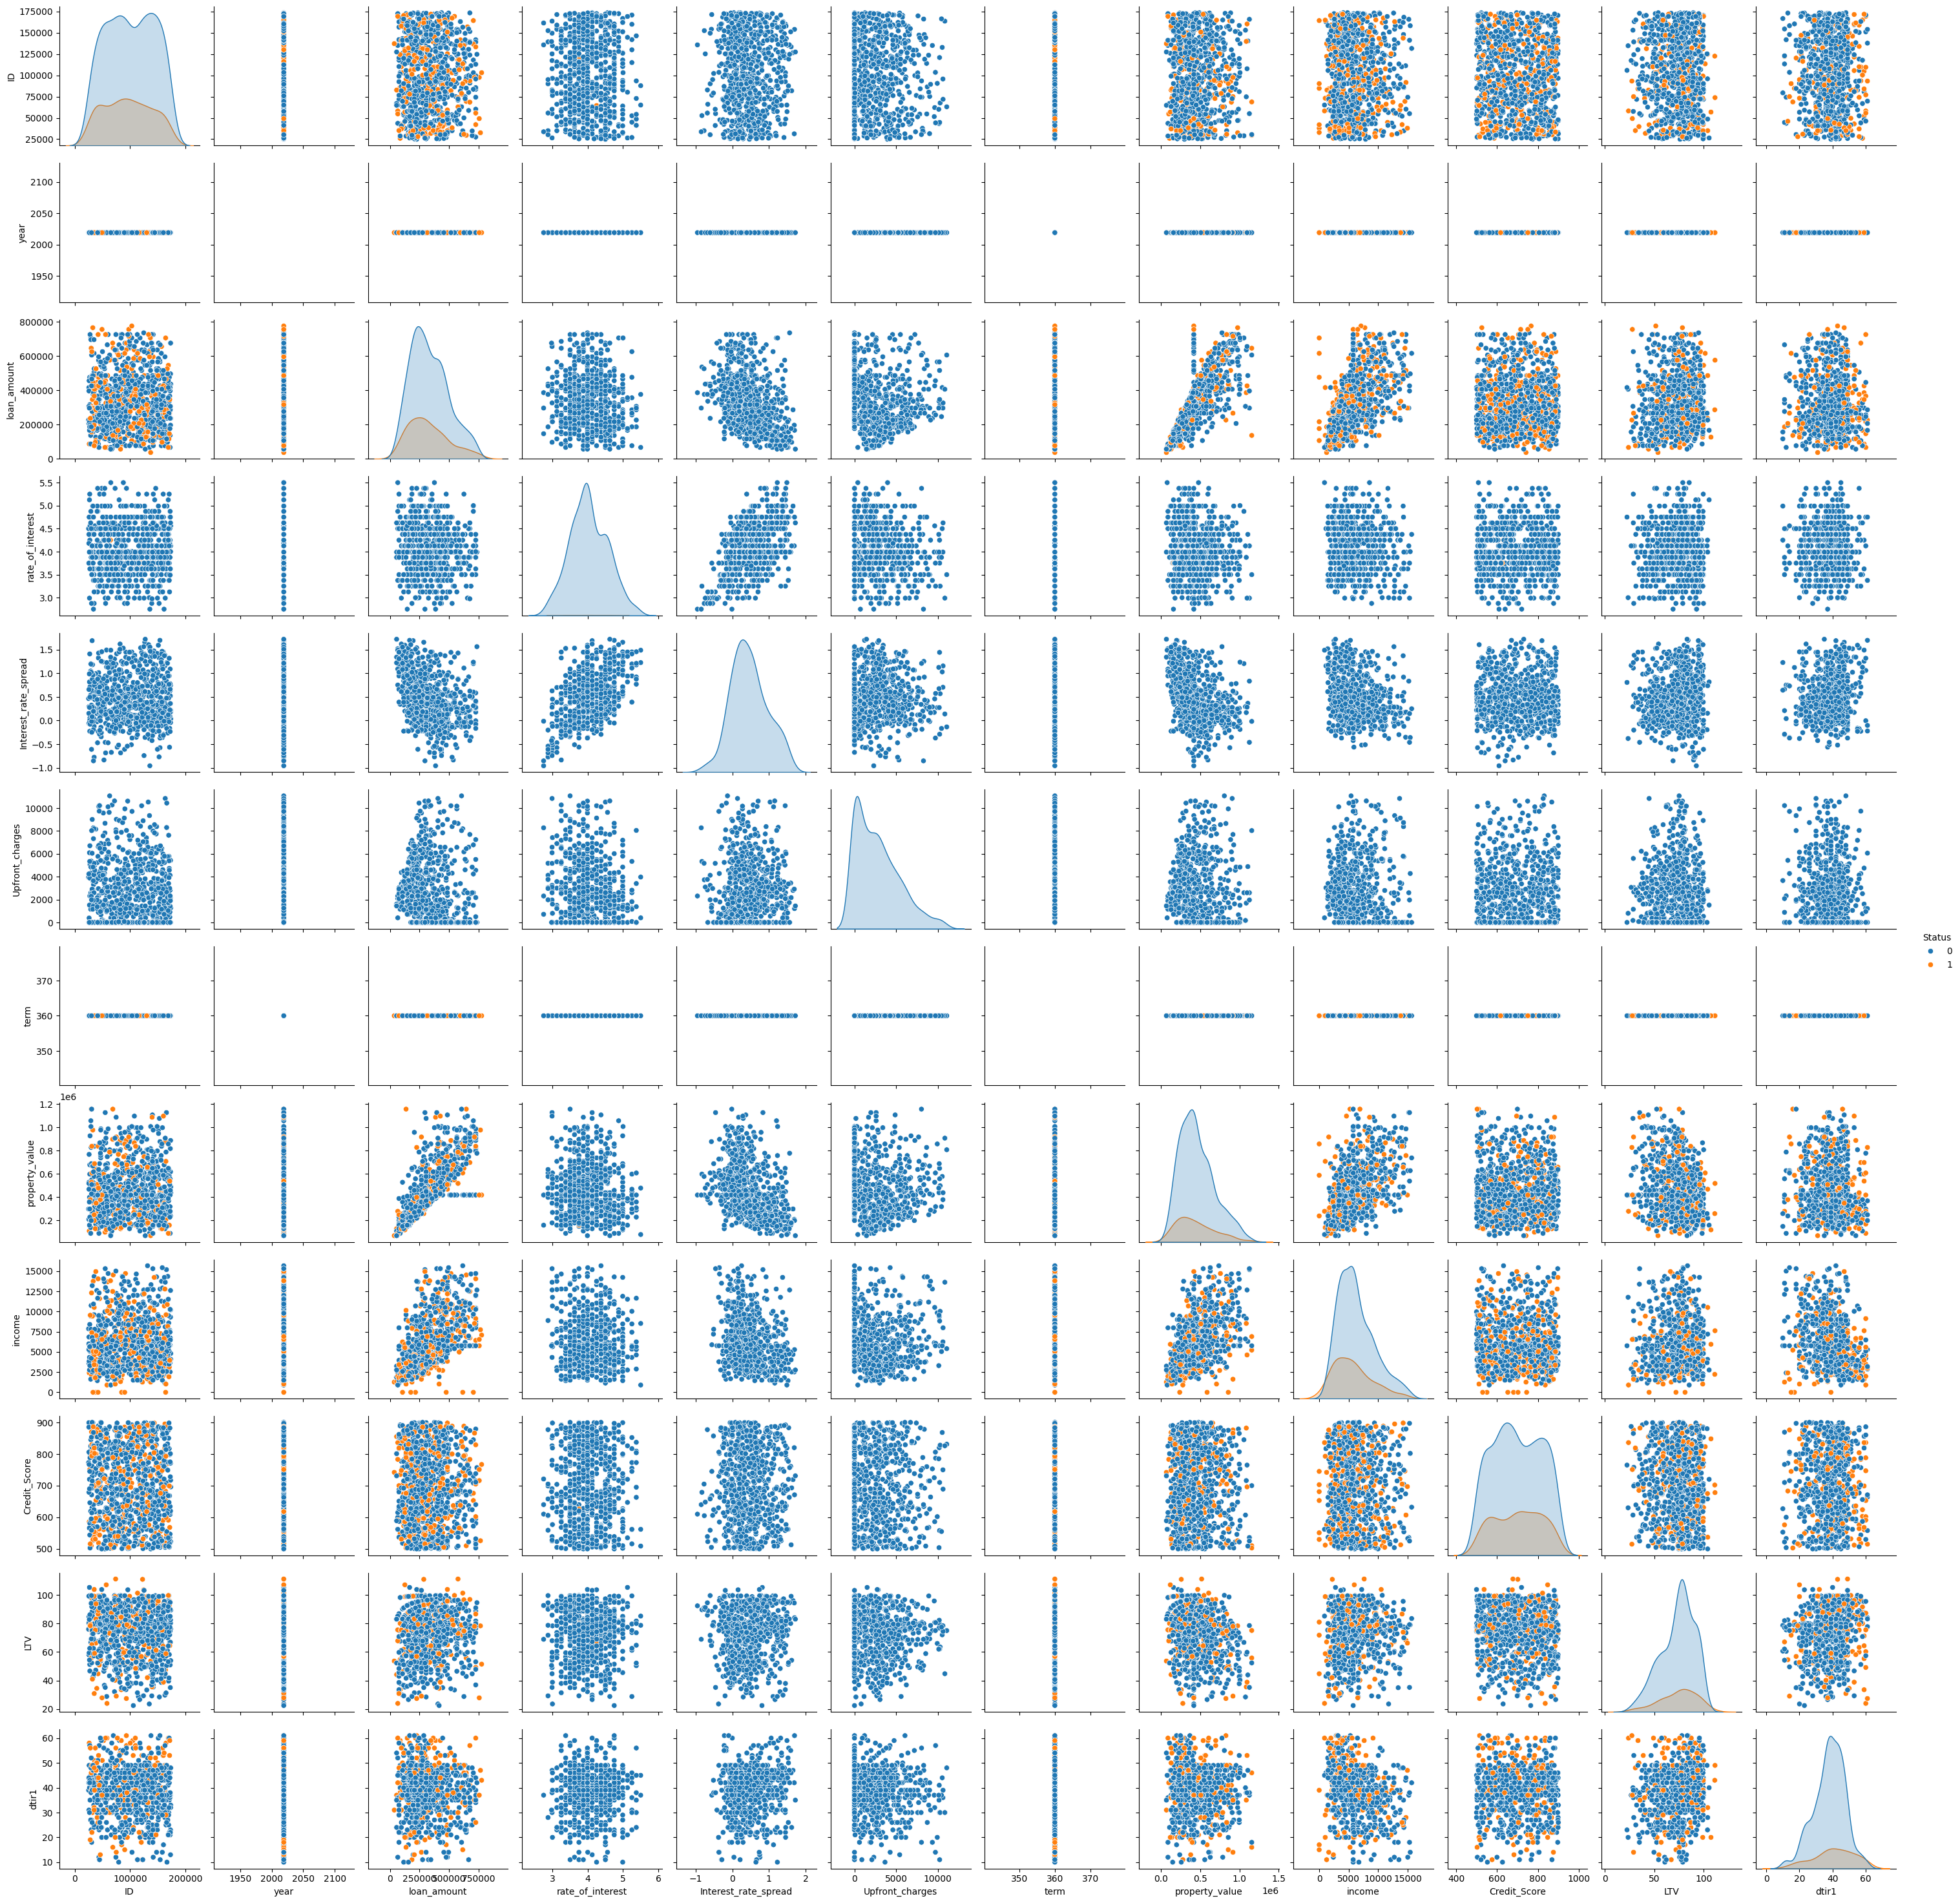

In [161]:
sns.pairplot(data=df_without_outliers.select_dtypes('number').sample(1000), hue="Status")

<Axes: >

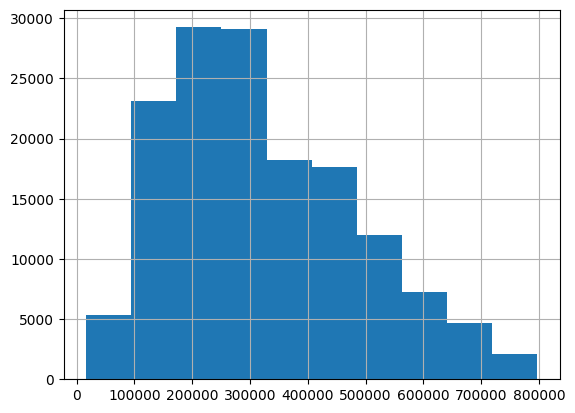

In [191]:
df_without_outliers['loan_amount'].hist()

# pca

In [72]:
only_num = X_train[[col for col in X_train.columns if 'num'  in col]]

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(only_num)


In [74]:
# Create a new DataFrame with the two principal components
df_pca = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

df_pca['target'] = y_train.values

In [75]:
X_train.shape

(111502, 51)

In [76]:
y_train.value_counts()

Status
0    83970
1    27532
Name: count, dtype: int64

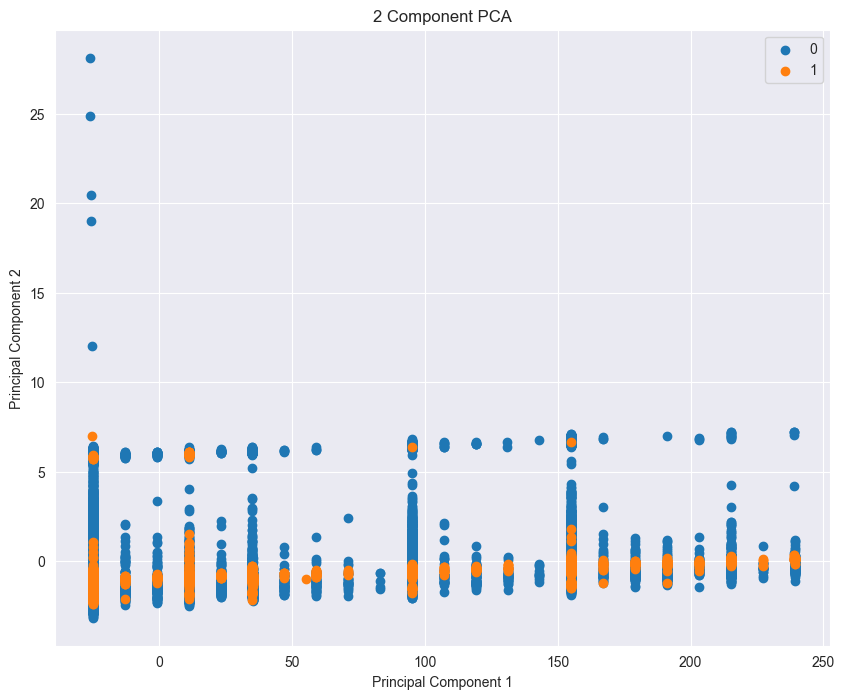

In [77]:
import numpy as np

plt.figure(figsize=(10, 8))

# Plot each category
for label in np.unique(y_train):
    plt.scatter(
        df_pca.loc[df_pca.target == label]['Principal Component 1'],
        df_pca.loc[df_pca.target == label]['Principal Component 2'],
        label=label
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.legend()
plt.show()


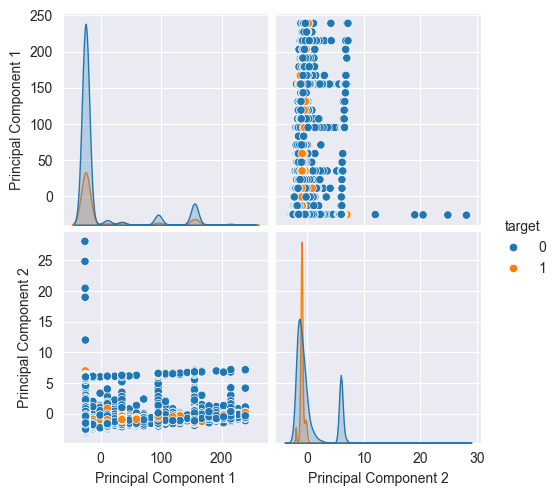

In [78]:
sns.pairplot(df_pca, hue='target')

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming only_num and y_train are already defined
lda = LinearDiscriminantAnalysis(n_components=1)

# LDA requires classes labels
lda_components = lda.fit_transform(only_num, y_train)

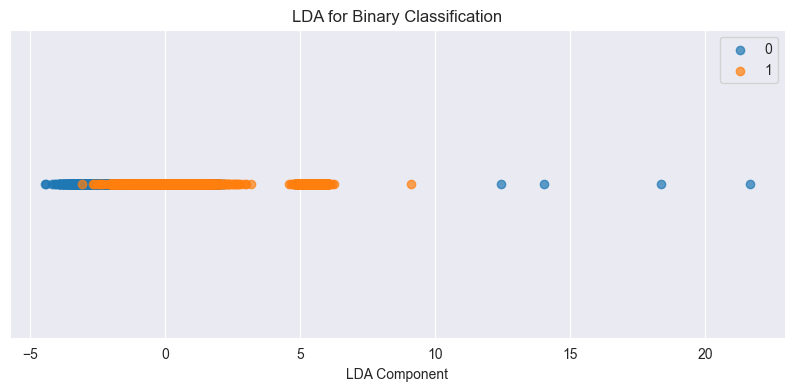

In [80]:
# Create a new DataFrame for LDA components
df_lda = pd.DataFrame(data=lda_components, columns=['LDA Component 1'])

df_lda['target'] = y_train.values

# Create a DataFrame to hold the LDA result and the actual label
lda_df = pd.DataFrame(data=lda_components, columns=['LDA Component'])
lda_df['target'] = y_train.values

# Plot
plt.figure(figsize=(10, 4))

# Scatter plot for each class
for label in np.unique(y_train):
    plt.scatter(lda_df.loc[lda_df.target == label]['LDA Component'],
                [0]*len(lda_df.loc[lda_df.target == label]),
                alpha=0.7,
                label=label)

plt.xlabel('LDA Component')
plt.title('LDA for Binary Classification')
plt.legend()
plt.yticks([])  # Hide the y-axis
plt.show()

In [73]:
_, X_partition, _, y_partition = train_test_split(only_num, y_train, test_size=0.03, stratify=y_train)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [74]:
X_partition.shape

(3346, 8)

In [75]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(X_partition)

In [76]:
# Create a DataFrame to hold the t-SNE results
df_tsne = pd.DataFrame(data=tsne_results, columns=['Dimension 1', 'Dimension 2'])
df_tsne['target'] = y_partition.values

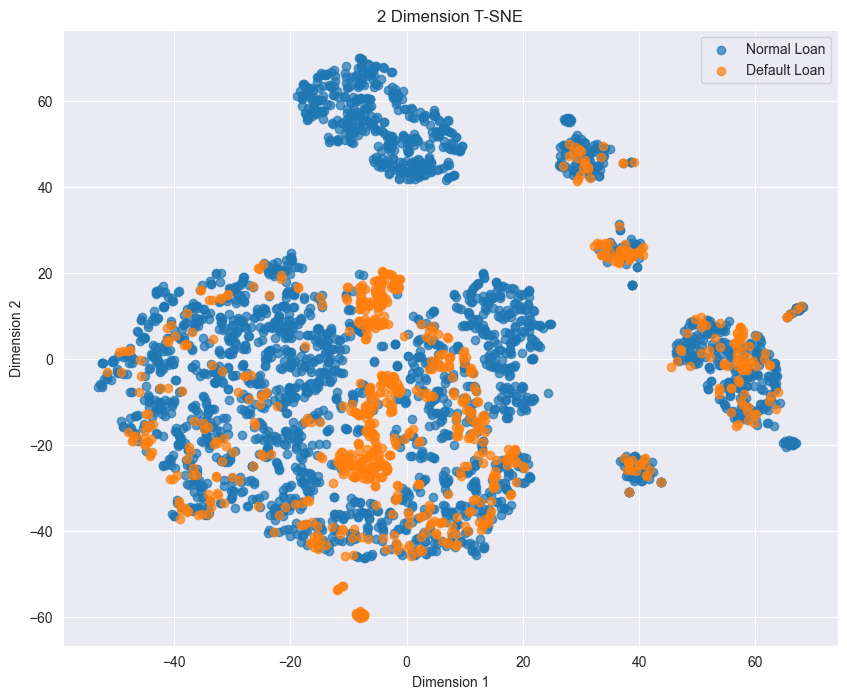

In [77]:
plt.figure(figsize=(10, 8))

# Plot each category
for label in np.unique(y_partition):

    plt.scatter(
        df_tsne.loc[df_tsne.target == label]['Dimension 1'],
        df_tsne.loc[df_tsne.target == label]['Dimension 2'],
        label=label,
        alpha=0.7
    )

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2 Dimension T-SNE')
plt.legend(['Normal Loan', 'Default Loan'])
plt.show()

In [555]:
X_train.head()

num_imp__ID  num_imp__year  num_imp__loan_amount  \
44091     -0.407556            0.0             -0.913043   
95258      0.280892            0.0              1.000000   
60216     -0.190596            0.0             -0.130435   
69045     -0.071802            0.0              0.173913   
115950     0.559301            0.0              0.478261   

        num_imp__rate_of_interest  num_imp__Upfront_charges  num_imp__term  \
44091                        0.00                  0.014952            0.0   
95258                        0.77                 -1.076883            0.0   
60216                       -0.98                  0.115612            0.0   
69045                       -0.48                  1.070392            0.0   
115950                       2.52                  0.699160            0.0   

        num_imp__property_value  num_imp__income  num_imp__Credit_Score  \
44091                 -1.185185        -0.936508                  0.810   
95258                  1.333333         0.333333                 -0.645   
60216                  0.518519        -0.936508                  0.215   
69045                 -0.222222         1.174603                 -0.580   
115950                 0.333333         0.349206                 -0.560   

        num_imp__LTV  ...  freq__construction_type  freq__occupancy_type  \
44091       0.652601  ...                      0.0               0.00000   
95258      -0.370917  ...                      0.0               0.00000   
60216      -1.360729  ...                      0.0               0.00000   
69045       0.937367  ...                      0.0               0.00000   
115950      0.242751  ...                      0.0              -0.87976   

        freq__Secured_by  freq__total_units  freq__credit_type  \
44091                0.0                0.0           0.613649   
95258                0.0                0.0           0.000000   
60216                0.0                0.0           0.000000   
69045                0.0                0.0           0.613649   
115950               0.0                0.0          -0.386351   

        freq__co-applicant_credit_type  freq__age  \
44091                              0.0   0.036216   
95258                              0.0   0.000000   
60216                              0.0  -0.963784   
69045                             -1.0   0.000000   
115950                             0.0   0.000000   

        freq__submission_of_application  freq__Region  freq__Security_Type  
44091                               0.0          -1.0                  0.0  
95258                              -1.0           0.0                  0.0  
60216                              -1.0          -1.0                  0.0  
69045                               0.0           0.0                  0.0  
115950                             -1.0           0.0                  0.0  

[5 rows x 118 columns]

In [556]:
train_data_raw.head()

ID  year  loan_amount  rate_of_interest  Interest_rate_spread  \
44091    68981  2019      86500.0             3.990                0.4835   
95258   120148  2019     526500.0             4.375                0.2761   
60216    85106  2019     266500.0             3.500               -0.0848   
69045    93935  2019     336500.0             3.750                0.3035   
115950  140840  2019     406500.0             5.250                0.8832   

        Upfront_charges   term  property_value   income  Credit_Score  ...  \
44091           2632.50  360.0         98000.0   2220.0           861  ...   
95258              0.00  360.0        778000.0   7020.0           570  ...   
60216           2875.20  360.0        558000.0   2220.0           742  ...   
69045           5177.25  360.0        358000.0  10200.0           583  ...   
115950          4282.18  360.0        508000.0   7080.0           587  ...   

        construction_type  occupancy_type  Secured_by total_units credit_type  \
44091                  sb              pr        home          1U         CIB   
95258                  sb              pr        home          1U        CRIF   
60216                  sb              pr        home          1U        CRIF   
69045                  sb              pr        home          1U         CIB   
115950                 sb              ir        home          1U         EXP   

       co-applicant_credit_type    age submission_of_application Region  \
44091                       CIB  35-44                   to_inst  south   
95258                       CIB  55-64                  not_inst  North   
60216                       CIB  65-74                  not_inst  south   
69045                       EXP  55-64                   to_inst  North   
115950                      CIB  55-64                  not_inst  North   

       Security_Type  
44091         direct  
95258         direct  
60216         direct  
69045         direct  
115950        direct  

[5 rows x 34 columns]

In [ ]:
# tests

In [209]:
from scipy.stats import chi2_contingency, fisher_exact

# Filter the DataFrame to only include 'Male' and 'Female' in the 'gender' column
df_filtered = df[df['Gender'].isin(['Male', 'Female'])]

# Create a contingency table
contingency_table = pd.crosstab(df_filtered['Gender'], df_filtered['Status'])

# Perform the Chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi2 value:", chi2)
print("P-value:", p_value)

# Interpretation of p_value
alpha = 0.05  # Or whatever you choose
if p_value < alpha:
    print("There is a significant relationship between gender and loan default status.")
else:
    print("There is no significant relationship between gender and loan default status.")

Chi2 value: 9.97975997289952
P-value: 0.0015827031471534522
There is a significant relationship between gender and loan default status.


In [211]:
# Perform the Chi-square test
chi2, p_value, = fisher_exact(contingency_table)

print("Fisher Exact value:", chi2)
print("P-value:", p_value)

# Interpretation of p_value
alpha = 0.05  # Or whatever you choose
if p_value < alpha:
    print("There is a significant relationship between gender and loan default status.")
else:
    print("There is no significant relationship between gender and loan default status.")

Fisher Exact value: 1.0580364992068558
P-value: 0.001529906570845882
There is a significant relationship between gender and loan default status.


In [218]:
# Create a contingency table
contingency_table = pd.crosstab(df['credit_type'], df['Status'])

# Perform the Chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi2 value:", chi2)
print("P-value:", p_value)

# Interpretation of p_value
alpha = 0.05  # Or whatever you choose
if p_value < alpha:
    print("There is a significant relationship between credit_type and loan default status.")
else:
    print("There is no significant relationship between credit_type and loan default status.")

Chi2 value: 52135.280704971796
P-value: 0.0
There is a significant relationship between credit_type and loan default status.


In [343]:
# Create a contingency table
contingency_table = pd.crosstab(df['Interest_rate_spread'].isna().astype(int), df['Status'])

# Perform the Chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi2 value:", chi2)
print("P-value:", p_value)

# Interpretation of p_value
alpha = 0.05  # Or whatever you choose
if p_value < alpha:
    print("There is a significant relationship between credit_type and loan default status.")
else:
    print("There is no significant relationship between credit_type and loan default status.")

Chi2 value: 148664.61530726912
P-value: 0.0
There is a significant relationship between credit_type and loan default status.


In [111]:
from scipy.stats import pointbiserialr

# numeric_feature = df_without_outliers[['Interest_rate_spread', 'Status']].fillna(0)['Interest_rate_spread']
numeric_feature = df_without_outliers['Interest_rate_spread'].isna().astype(int)
binary_feature = df_without_outliers[['Interest_rate_spread', 'Status']]['Status']
# Compute Point-Biserial Correlation
result = pointbiserialr(numeric_feature, binary_feature)

print("Point-Biserial Correlation Coefficient:", result.correlation)
print("p-value:", result.pvalue)

# Interpretation of p_value
alpha = 0.05  # significance level
if result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant relationship between the features.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between the features.")

Point-Biserial Correlation Coefficient: 0.9920059301165677
p-value: 0.0
Reject the null hypothesis: There is a significant relationship between the features.


In [112]:
result = pointbiserialr(df['Credit_Score'], df['Status'])
print("Point-Biserial Correlation Coefficient:", result.correlation)
print("P-value:", result.pvalue)

# Interpretation of p_value
alpha = 0.05  # significance level
if result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant relationship between the features.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between the features.")

Point-Biserial Correlation Coefficient: 0.004003693595587567
P-value: 0.12265440254175466
Fail to reject the null hypothesis: There is no significant relationship between the features.


In [117]:
point_df = df[['Upfront_charges', 'Status']].dropna()
result = pointbiserialr(point_df['Upfront_charges'], point_df['Status'])


print('Features to test: Upfront_charges and Status (target)')

print("Point-Biserial Correlation Coefficient:", result.correlation)
print("P-value:", result.pvalue)

# Interpretation of p_value
alpha = 0.05  # significance level
if result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant relationship between the features.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between the features.")

Features to test: Upfront_charges and Status (target)
Point-Biserial Correlation Coefficient: -0.01913794191908527
P-value: 2.620077717261891e-10
Reject the null hypothesis: There is a significant relationship between the features.


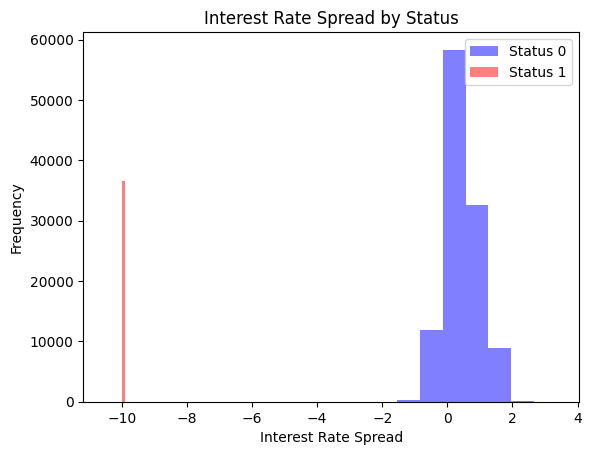

In [776]:
plt.hist(df['Interest_rate_spread'].loc[df.Status == 0],
         color='blue', alpha=0.5, label='Status 0')
plt.hist(df['Interest_rate_spread'].loc[df.Status == 1].fillna(-10),
         color='red', alpha=0.5, label='Status 1')

plt.title('Interest Rate Spread by Status')
plt.xlabel('Interest Rate Spread')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

In [777]:
df_without_outliers['Interest_rate_spread'].loc[df_without_outliers.Status == 1]

0        NaN
1        NaN
10       NaN
12       NaN
15       NaN
          ..
148651   NaN
148652   NaN
148658   NaN
148661   NaN
148663   NaN
Name: Interest_rate_spread, Length: 36639, dtype: float64

In [783]:
pd.concat([df_without_outliers['Interest_rate_spread'].isna(), df_without_outliers['Status']], axis=1).value_counts()

Interest_rate_spread  Status
False                 0         111586
True                  1          36639
                      0            445
Name: count, dtype: int64

In [87]:
clusters = kmeans.fit_transform(only_num)

ValueError: at least one array or dtype is required

# clustering

In [87]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids

kmeans = KMeans(n_clusters=2)
kmed = KMedoids(n_clusters=2)
dbscan = DBSCAN(eps=1)

In [88]:
kmeans.fit(X_train)

KMeans(n_clusters=2)

In [90]:
dbscan.fit(X_train)

DBSCAN(eps=1)

In [64]:
# kmed.fit(X_train)

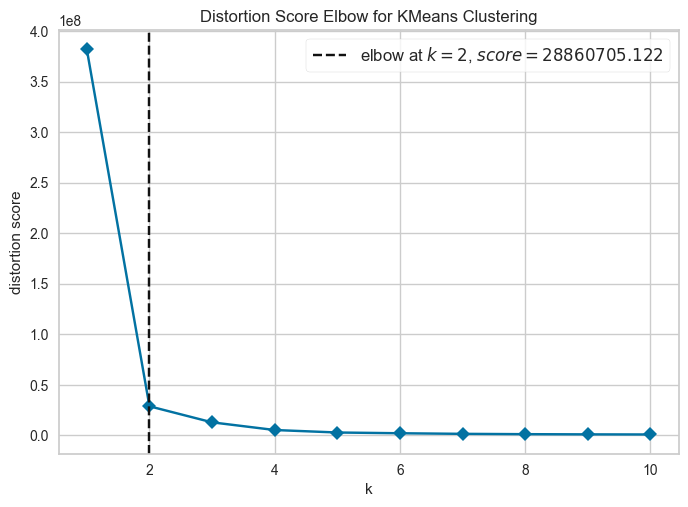

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(1, 11), timings=False)

# Fit and visualize
visualizer.fit(only_num)
visualizer.show()

In [92]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
epsilon = 0.7
min_samples = 5

model = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = model.fit_predict(X_train)

# Filter out noise points (labelled as -1)
non_noise_indices = labels != -1
filtered_labels = labels[non_noise_indices]
filtered_X = X_train[non_noise_indices]

# Calculate silhouette score
if len(set(filtered_labels)) > 1:
    score = silhouette_score(filtered_X, filtered_labels)
    print(f'Silhouette Score: {score}')
else:
    print('Not enough clusters found to calculate Silhouette Score.')

Silhouette Score: 0.5692587181315438


In [175]:
from sklearn.neighbors import NearestNeighbors

# Compute the nearest neighbors
k = 4  # Choose an arbitrary k (should be same as MinPts parameter minus 1)
nn = NearestNeighbors(n_neighbors=k)
nn_fit = nn.fit(only_num)
distances, indices = nn_fit.kneighbors(only_num)

# Sort distance values
distances = np.sort(distances, axis=0)
distances = distances[:, -1]  # Take the last column (largest k-th distance)



KeyboardInterrupt: 

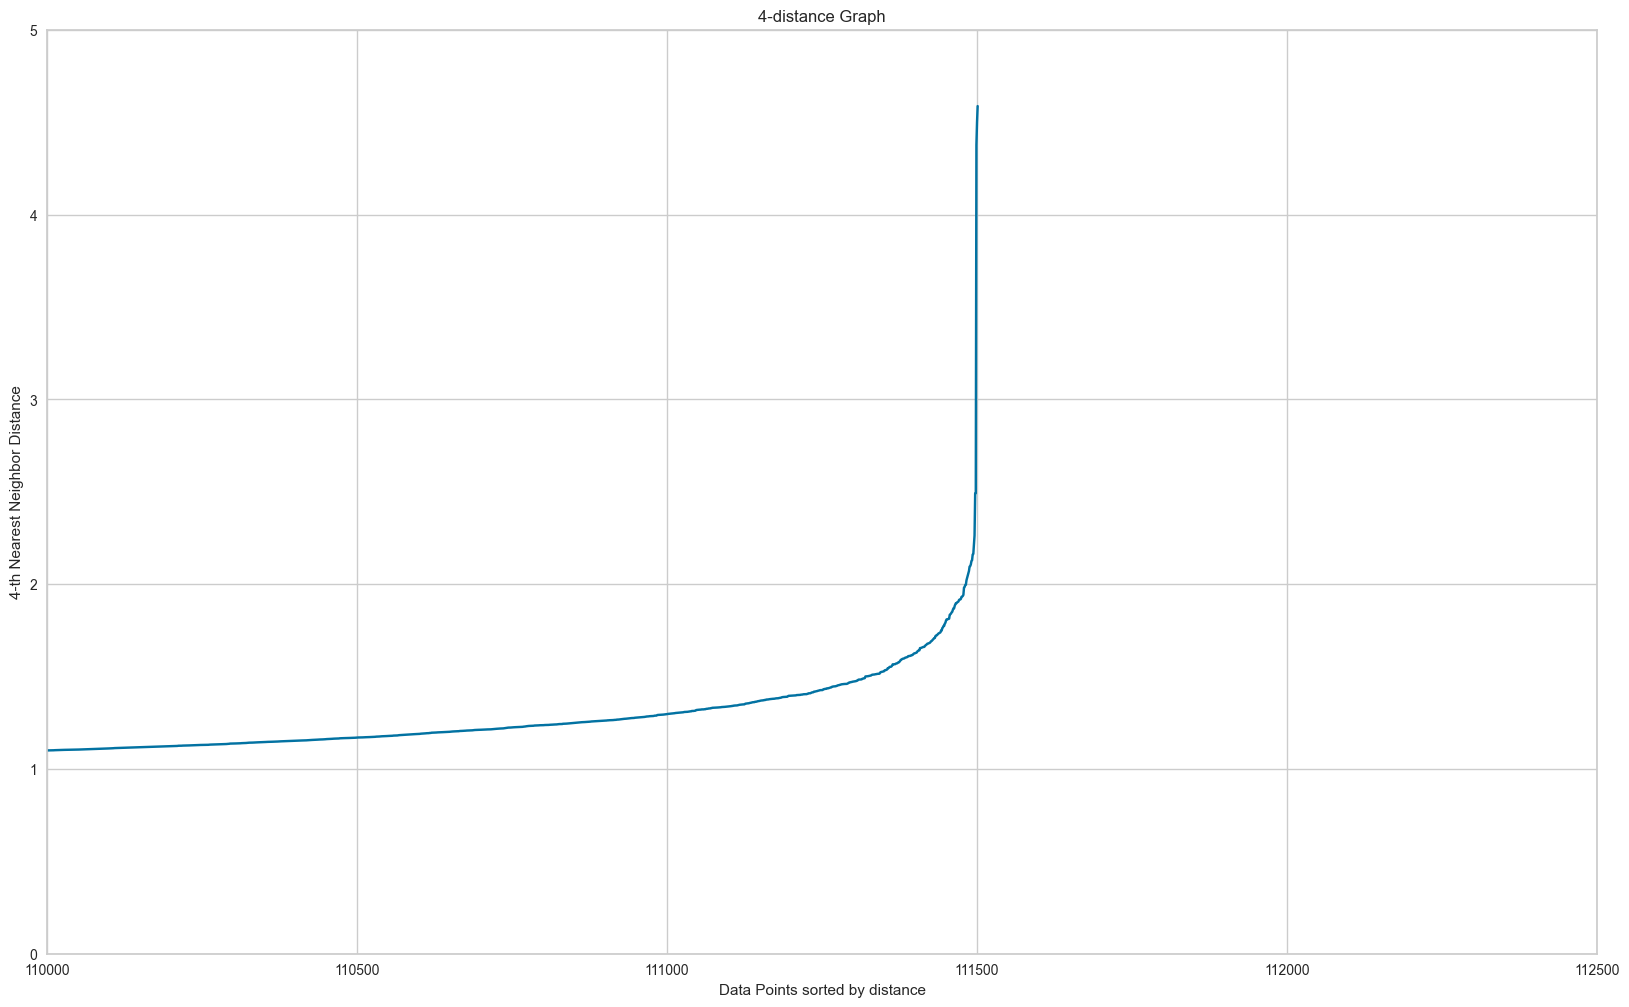

In [176]:
# Plot k-distance graph
plt.figure(figsize=(20, 12))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')

plt.xlim([110000, 112500])
plt.ylim([0, 5])

plt.title(f'{k}-distance Graph')
plt.grid(True)
plt.show()

In [93]:
dbscan.fit(only_num)

DBSCAN(eps=1)

In [105]:
kmeans = KMeans(n_clusters=2)

In [106]:
kmeans.fit(only_num)

KMeans(n_clusters=2)

In [107]:
# labels = dbscan.labels_
labels = kmeans.labels_

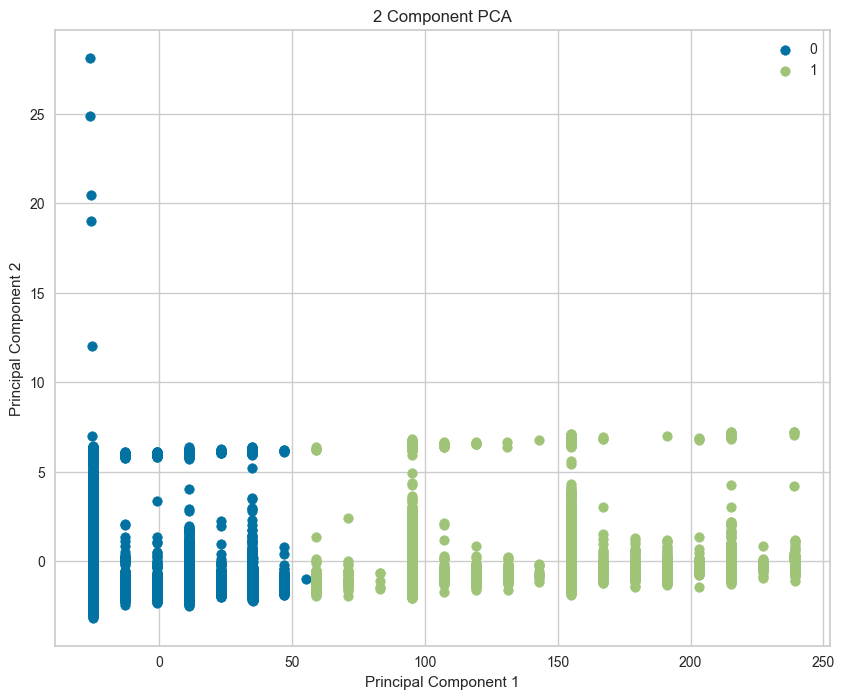

In [108]:
import numpy as np

plt.figure(figsize=(10, 8))

# Plot each category
for label in np.unique(labels):
    plt.scatter(
        df_pca.loc[labels == label]['Principal Component 1'],
        df_pca.loc[labels == label]['Principal Component 2'],
        label=label
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.legend()
plt.show()


In [97]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')


In [98]:
sample = only_num.sample(10000)

In [99]:
sample_pca = df_pca.loc[pd.Series(y_train.index).isin(sample.index)]

In [100]:
agg_clustering.fit(sample)

AgglomerativeClustering()

In [101]:
labels = agg_clustering.labels_

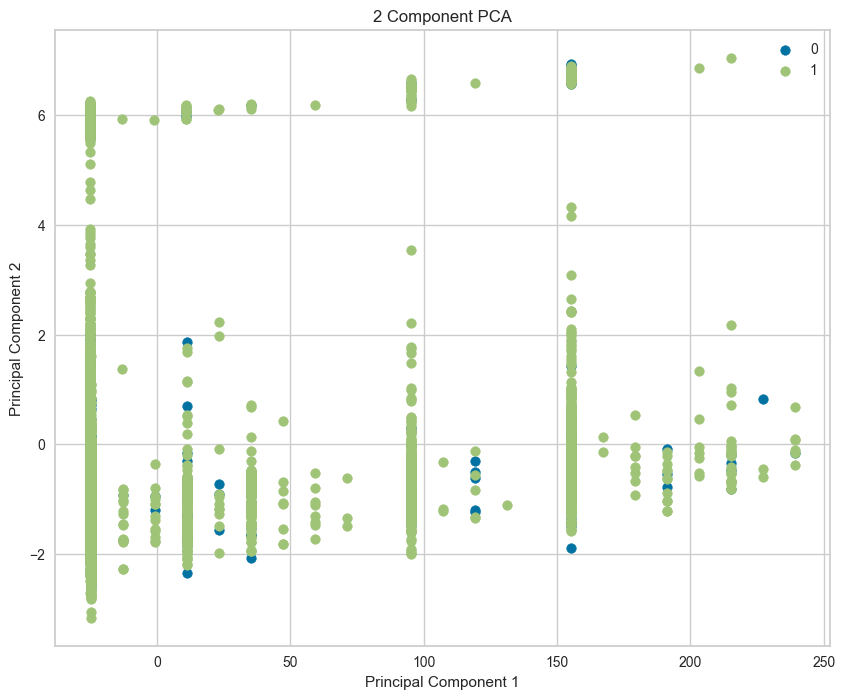

In [102]:
import numpy as np

plt.figure(figsize=(10, 8))

# Plot each category
for label in np.unique(labels):
    plt.scatter(
        sample_pca.loc[labels == label]['Principal Component 1'],
        sample_pca.loc[labels == label]['Principal Component 2'],
        label=label
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.legend()
plt.show()


In [111]:
from seaborn.matrix import dendrogram

In [109]:
from scipy.cluster.hierarchy import linkage

# Create a linkage matrix
Z = linkage(sample, method='ward')

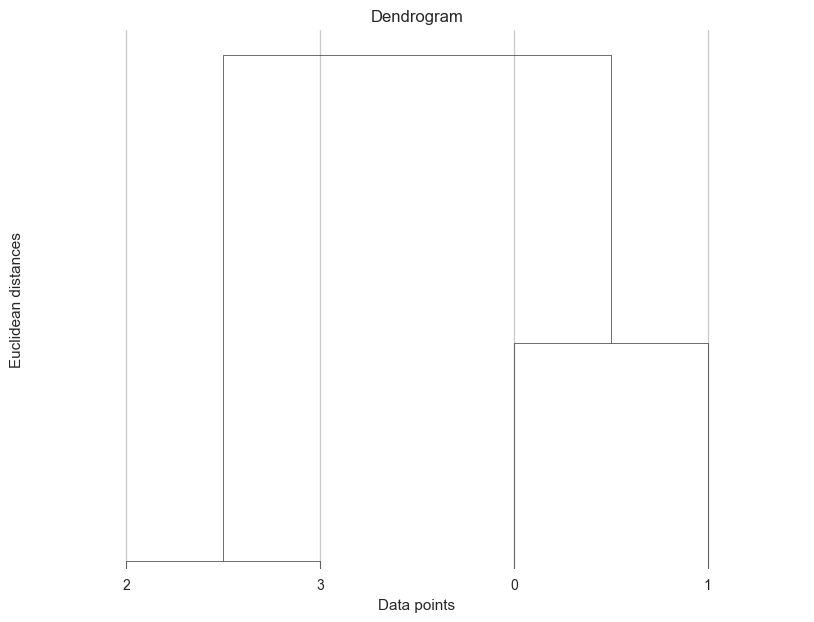

In [112]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

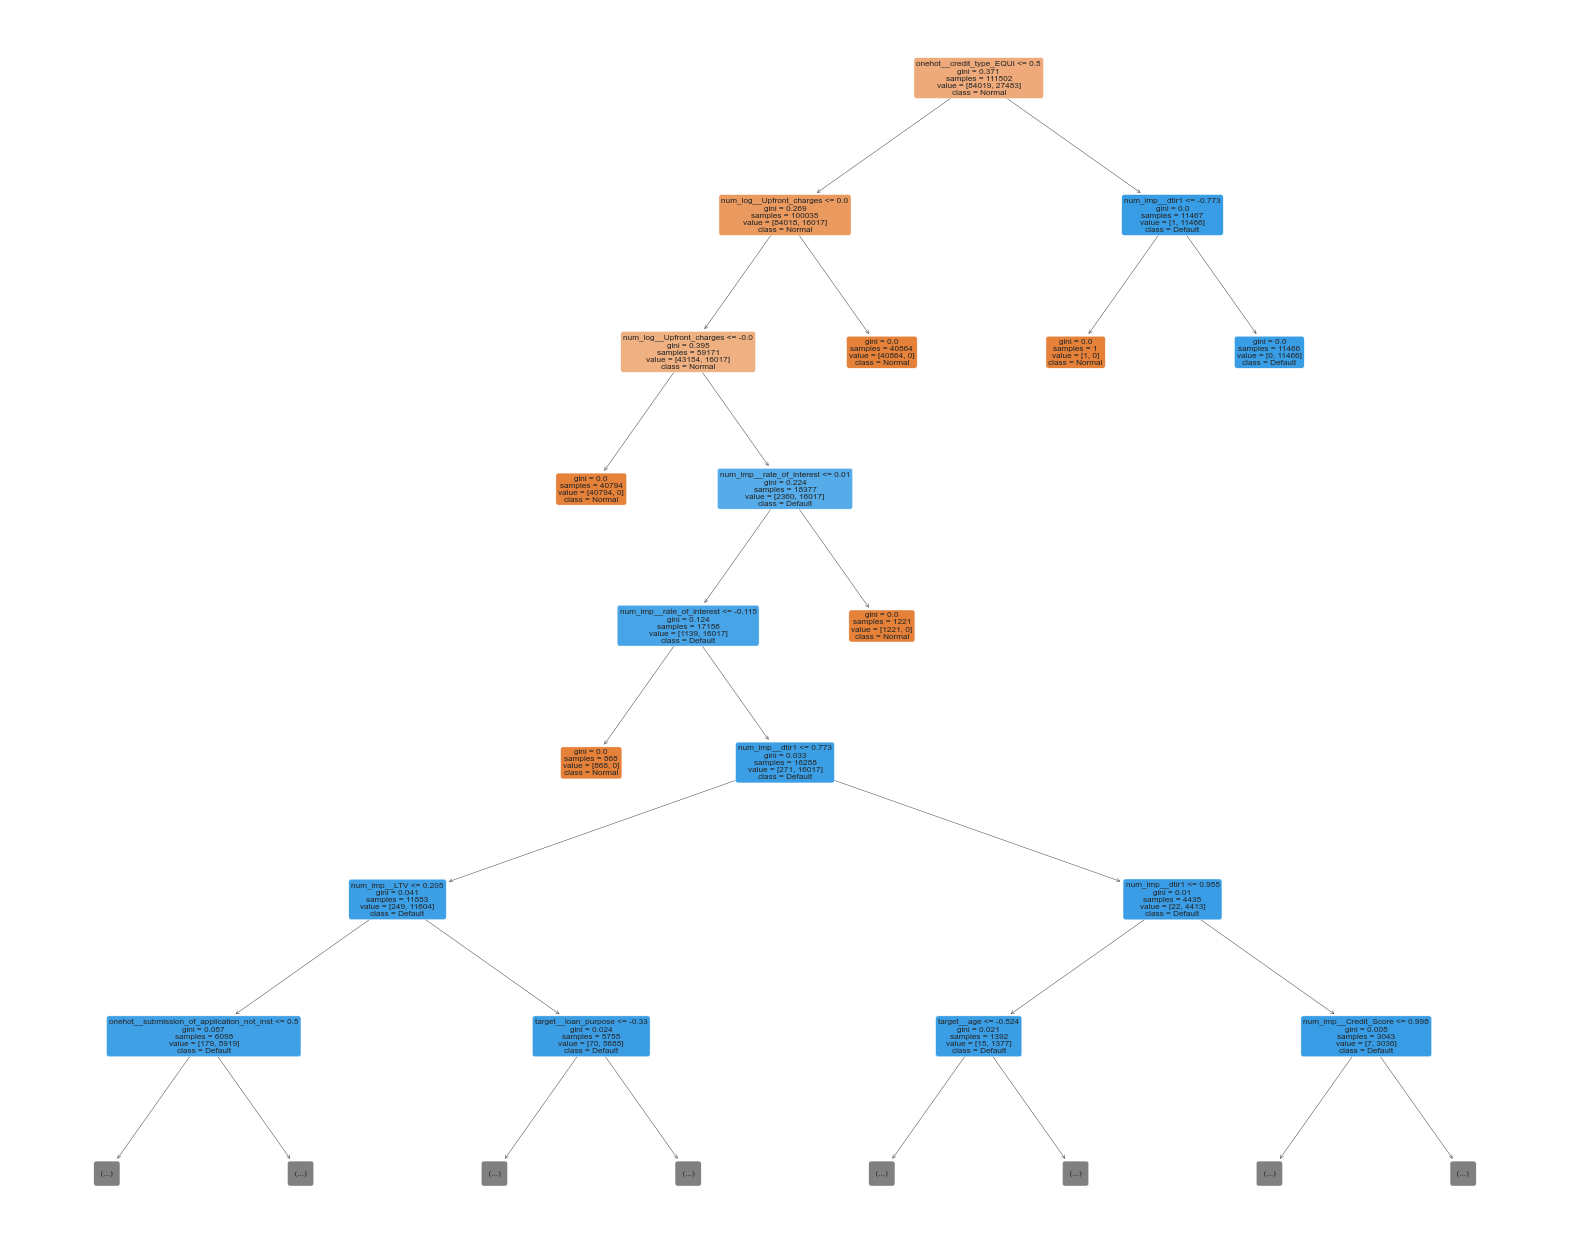

In [177]:
from sklearn.tree import plot_tree

# Create a new figure and set the size
plt.figure(figsize=(20, 16))

# Plot the tree
plot_tree(
    models['Decision Tree'],
    max_depth=7,
    filled=True,
    feature_names=list(X_train.columns),
    class_names=['Normal', 'Default'],
    rounded=True)

# Show the plot
plt.show()

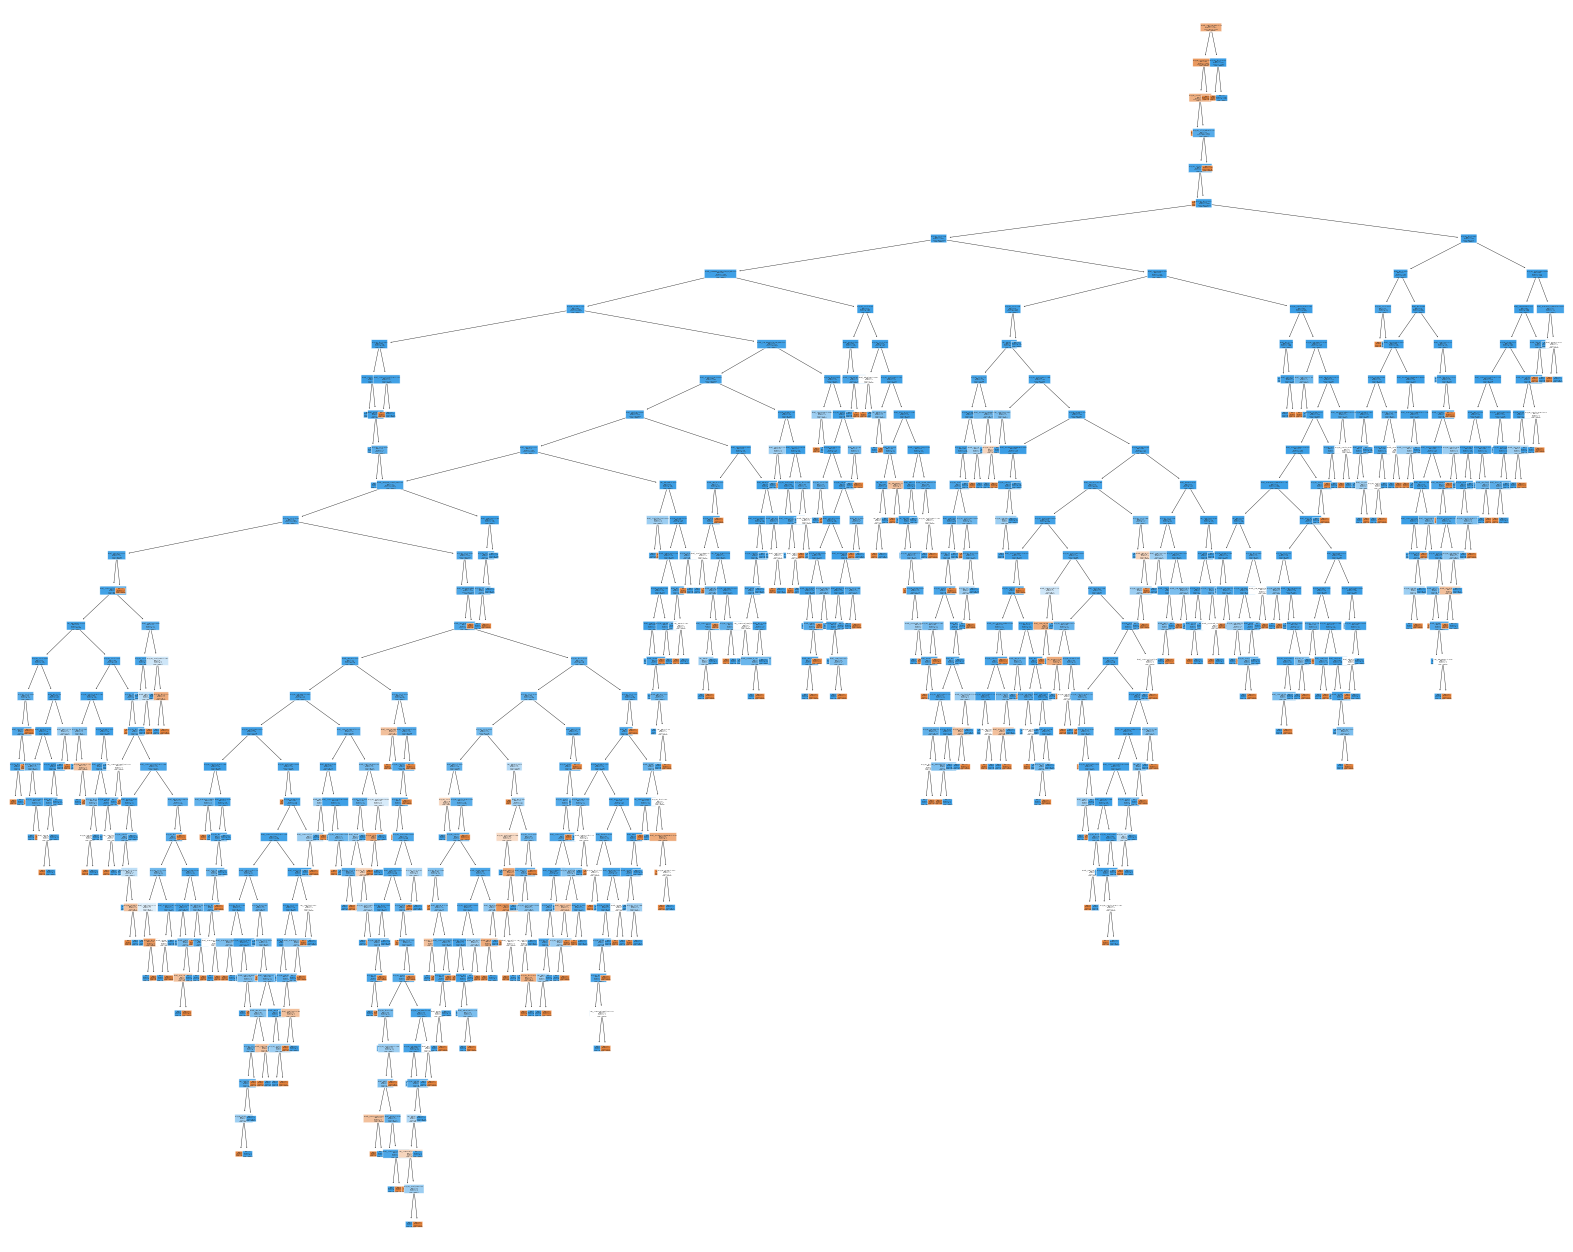

In [178]:
from sklearn.tree import plot_tree

# Create a new figure and set the size
plt.figure(figsize=(20, 16))

# Plot the tree
plot_tree(
    models['Decision Tree'],
    # max_depth=7,
    filled=True,
    feature_names=list(X_train.columns),
    class_names=['Normal', 'Default'],
    rounded=True)

# Show the plot
plt.show()

In [208]:
def get_decision_rules(tree, feature_names, class_names, max_depth=None):
    tree_ = tree.tree_
    feature_name = [feature_names[i] if i != -2 else "undefined" for i in tree_.feature]
    rules_list = []

    def recurse(node, rules, depth):
        if max_depth is not None and depth > max_depth:
            return
        if tree_.feature[node] != -2:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            recurse(tree_.children_left[node], rules + [f"({name} <= {threshold:.2f})"], depth+1)
            recurse(tree_.children_right[node], rules + [f"({name} > {threshold:.2f})"], depth+1)
        else:
            dist = tree_.value[node][0]
            total = np.sum(dist)
            probs = [round(d / total, 2) for d in dist]
            max_class = np.argmax(dist)
            max_class_name = class_names[max_class]
            rules_list.append(f"if {' and '.join(rules)} then {max_class_name} (probs: {probs})")

    recurse(0, [], 0)
    return rules_list

In [209]:
rules = get_decision_rules(models['Decision Tree'], list(X_train.columns), ['Normal', 'Default'], 7)

In [210]:
len(rules)

7

In [212]:
rules

['if (freq__credit_type <= -2.37) and (num_imp__dtir1 <= -0.85) then Normal (probs: [1.0, 0.0])',
 'if (freq__credit_type <= -2.37) and (num_imp__dtir1 > -0.85) then Default (probs: [0.0, 1.0])',
 'if (freq__credit_type > -2.37) and (num_imp__Upfront_charges <= 0.00) and (num_imp__Upfront_charges <= -0.00) then Normal (probs: [1.0, 0.0])',
 'if (freq__credit_type > -2.37) and (num_imp__Upfront_charges <= 0.00) and (num_imp__Upfront_charges > -0.00) and (num_imp__rate_of_interest <= -0.12) then Normal (probs: [1.0, 0.0])',
 'if (freq__credit_type > -2.37) and (num_imp__Upfront_charges <= 0.00) and (num_imp__Upfront_charges > -0.00) and (num_imp__rate_of_interest > -0.12) and (num_imp__rate_of_interest <= 0.01) and (freq__open_credit <= -0.50) and (num_imp__income <= -0.87) then Default (probs: [0.0, 1.0])',
 'if (freq__credit_type > -2.37) and (num_imp__Upfront_charges <= 0.00) and (num_imp__Upfront_charges > -0.00) and (num_imp__rate_of_interest > -0.12) and (num_imp__rate_of_interest 

In [219]:
def get_decision_table(tree, feature_names, class_names, max_depth=None):
    tree_ = tree.tree_
    feature_name = [feature_names[i] if i != -2 else "undefined" for i in tree_.feature]
    table = []

    def recurse(node, rules, depth):
        if max_depth is not None and depth > max_depth:
            return
        if tree_.feature[node] != -2:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            recurse(tree_.children_left[node], rules + [(name, f"<= {threshold:.2f}")], depth+1)
            recurse(tree_.children_right[node], rules + [(name, f"> {threshold:.2f}")], depth+1)
        else:
            dist = tree_.value[node][0]
            total = np.sum(dist)
            probs = [round(d / total, 2) for d in dist]
            max_class = np.argmax(dist)
            max_class_name = class_names[max_class]

            row = {name: condition for name, condition in rules}
            row['Outcome'] = max_class_name
            table.append(row)

    recurse(0, [], 0)
    return pd.DataFrame(table).fillna("")

In [220]:
decision_table = get_decision_table(models['Decision Tree'], list(X_train.columns), ['Normal', 'Default'], 7)
print(decision_table)

  freq__credit_type num_imp__dtir1  Outcome num_imp__Upfront_charges  \
0          <= -2.37       <= -0.85   Normal                            
1          <= -2.37        > -0.85  Default                            
2           > -2.37                  Normal                 <= -0.00   
3           > -2.37                  Normal                  > -0.00   
4           > -2.37                 Default                  > -0.00   
5           > -2.37                  Normal                  > -0.00   
6           > -2.37                  Normal                   > 0.00   

  num_imp__rate_of_interest freq__open_credit num_imp__income  
0                                                              
1                                                              
2                                                              
3                  <= -0.12                                    
4                   <= 0.01          <= -0.50        <= -0.87  
5                    > 0.01            

In [221]:
decision_table

freq__credit_type num_imp__dtir1  Outcome num_imp__Upfront_charges  \
0          <= -2.37       <= -0.85   Normal                            
1          <= -2.37        > -0.85  Default                            
2           > -2.37                  Normal                 <= -0.00   
3           > -2.37                  Normal                  > -0.00   
4           > -2.37                 Default                  > -0.00   
5           > -2.37                  Normal                  > -0.00   
6           > -2.37                  Normal                   > 0.00   

  num_imp__rate_of_interest freq__open_credit num_imp__income  
0                                                              
1                                                              
2                                                              
3                  <= -0.12                                    
4                   <= 0.01          <= -0.50        <= -0.87  
5                    > 0.01                                    
6

In [211]:
pd.Series(rules).head(10)

0    if (freq__credit_type <= -2.37) and (num_imp__...
1    if (freq__credit_type <= -2.37) and (num_imp__...
2    if (freq__credit_type > -2.37) and (num_imp__U...
3    if (freq__credit_type > -2.37) and (num_imp__U...
4    if (freq__credit_type > -2.37) and (num_imp__U...
5    if (freq__credit_type > -2.37) and (num_imp__U...
6    if (freq__credit_type > -2.37) and (num_imp__U...
dtype: object

In [193]:
kmeans = KMeans(n_clusters=8)

In [194]:
kmeans.fit(only_num)

KMeans()

In [195]:
model = kmeans

In [196]:
p_test = model.predict(X_test[only_num.columns])
p_train = model.predict(only_num)

In [197]:

print('TEST')
print(classification_report(y_test, p_test))
print(confusion_matrix(y_test, p_test))
print('TRAIN')
print(classification_report(y_train, p_train))
print(confusion_matrix(y_train, p_train))

TEST
              precision    recall  f1-score   support

           0       0.61      0.16      0.25     28089
           1       0.00      0.00      0.00      9079
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.12     37168
   macro avg       0.08      0.02      0.03     37168
weighted avg       0.47      0.12      0.19     37168

[[4380 5233 4088 5668    1 3630 1905 3184]
 [2747   12   12 4550  309  693    1  755]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]